# 📊 Dataset difficulty - Jupyter notebook

In [2]:
%load_ext autoreload
%autoreload 2

## Augmentation

standard transformation only creates new columens *sentence1* and *sentence 2* for standardization, null transformation pass empty strings to these variables

In [ ]:
from dataset_difficulty.augment import FEVERStandardTransformation, FEVERNullTransformation

FEVERStandardTransformation("ctu-aic/csfever_v2","/home/mlynatom/data/dataset_difficulty/augmentation/csfever_v2/", dataset_subset="original_nli").transform()
FEVERNullTransformation("ctu-aic/csfever_v2","/home/mlynatom/data/dataset_difficulty/augmentation/csfever_v2/", dataset_subset="original_nli").transform()

## Train Models

Do using other finetuning scripts

## Estimate V-usable Info

In [21]:
from dataset_difficulty.v_info import v_info

DATASET_PATH = "/home/mlynatom/data/dataset_difficulty/augmentation/csfever_v2/"
SPLITS = ["train", 
          "dev", 
          #"test"
          ]

for split in SPLITS:
       v_info(data_fn=f"{DATASET_PATH}fever_{split}_std.csv", 
              model="/home/mlynatom/models/peft-lora-xlm-roberta-large-squad2-csfever_v2-original_nli-r8-alpha16_bias-none", 
              null_data_fn=f"{DATASET_PATH}fever_{split}_null.csv",
              null_model="/home/mlynatom/models/peft-lora-xlm-roberta-large-squad2-csfever_v2_null-original_nli-r8-alpha16_bias-none",
              tokenizer="ctu-aic/xlm-roberta-large-squad2-csfever_v2-f1",
              out_fn=f"/home/mlynatom/data/dataset_difficulty/PVI/csfever_v2_{split}.csv",
              input_key="sentence1",
              input_key2="sentence2",
              use_lora=True)

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at deepset/xlm-roberta-large-squad2 and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
  1%|          | 10/1190 [00:14<28:51,  1.47s/it]/home/mlynatom/venvs/py3.9.6/lib/python3.9/site-packages/transformers/pipelines/base.py:1083: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1190/1190 [29:14<00:00,  1.47s/it]
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at deepset/xlm-roberta-large-squad2 and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias']
You shoul

## PVI Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
train_data = pd.read_csv("/home/mlynatom/data/dataset_difficulty/PVI/csfever_v2_train.csv")
dev_data = pd.read_csv("/home/mlynatom/data/dataset_difficulty/PVI/csfever_v2_dev.csv")
test_data = pd.read_csv("/home/mlynatom/data/dataset_difficulty/PVI/csfever_v2_test.csv")

In [20]:
# for first analysing part
data = test_data
#data = train_data
#data = dev_data

In [6]:
data

Unnamed: 0      id  label  \
0                0   55231      1   
1                1  225400      2   
2                2  184972      0   
3                3  208571      0   
4                4  100075      2   
...            ...     ...    ...   
118945      118945    6665      0   
118946      118946   43743      2   
118947      118947   66913      0   
118948      118948   66780      0   
118949      118949  227028      1   

                                                    claim  \
0                        Mohamed není pro islám důležitý.   
1       Absolute Beginners byla indie kapela založená ...   
2         Yamaha Corporation působí především v Japonsku.   
3              Existuje země, která se jmenuje Indonésie.   
4           Seth Rogen získal vedlejší roli v The Office.   
...                                                   ...   
118945                          Hawaii Five-0 je restart.   
118946                    Muhammad je pro tenis důležitý.   
118947        Xbox One byl vyroben společností Microsoft.   
118948      Existuje fotbalista jménem Cristiano Ronaldo.   
118949   The People vs. Larry Flynt je životopisné drama.   

                                                 evidence  \
0       Mohamed. Mohamed (; 25. dubna 571 Mekka – 8. č...   
1       Mod (subkultura). Mod (původně modernist) je s...   
2       Yamaha. Obchodní společnost Yamaha (ヤマハ株式会社 "Y...   
3       Indonésie. Indonésie, plným názvem Indonéská r...   
4       Seth Rogen. Seth Rogen (* 15. dubna 1982, Vanc...   
...                                                   ...   
118945  Hawaii 5-0. Hawaii 5-0 (též Havaj 5-0, v angli...   
118946  Gulbuddín Hekmatjár. Gulbuddín Hekmatjár, (* 1...   
118947  Xbox One. Xbox One je videoherní konzole, kter...   
118948  Cristiano Ronaldo. Cristiano Ronaldo dos Santo...   
118949  Lid versus Larry Flynt. Lid versus Larry Flynt...   

                                                sentence1  \
0                        Mohamed není pro islám důležitý.   
1       Absolute Beginners byla indie kapela založená ...   
2         Yamaha Corporation působí především v Japonsku.   
3              Existuje země, která se jmenuje Indonésie.   
4           Seth Rogen získal vedlejší roli v The Office.   
...                                                   ...   
118945                          Hawaii Five-0 je restart.   
118946                    Muhammad je pro tenis důležitý.   
118947        Xbox One byl vyroben společností Microsoft.   
118948      Existuje fotbalista jménem Cristiano Ronaldo.   
118949   The People vs. Larry Flynt je životopisné drama.   

                                                sentence2      H_yb      H_yx  \
0       Mohamed. Mohamed (; 25. dubna 571 Mekka – 8. č...  2.620849  0.050512   
1       Mod (subkultura). Mod (původně modernist) je s...  1.603840  0.000850   
2       Yamaha. Obchodní společnost Yamaha (ヤマハ株式会社 "Y...  0.975885  0.046157   
3       Indonésie. Indonésie, plným názvem Indonéská r...  0.975885  0.005154   
4       Seth Rogen. Seth Rogen (* 15. dubna 1982, Vanc...  1.603840  0.121568   
...                                                   ...       ...       ...   
118945  Hawaii 5-0. Hawaii 5-0 (též Havaj 5-0, v angli...  0.975885  0.122452   
118946  Gulbuddín Hekmatjár. Gulbuddín Hekmatjár, (* 1...  1.603840  0.000356   
118947  Xbox One. Xbox One je videoherní konzole, kter...  0.975885  0.013941   
118948  Cristiano Ronaldo. Cristiano Ronaldo dos Santo...  0.975885  0.004479   
118949  Lid versus Larry Flynt. Lid versus Larry Flynt...  2.620849  3.808986   

        correct_yx  predicted_label  predicted_score       PVI  
0             True                1         0.965593  2.570337  
1             True                2         0.999411  1.602990  
2             True                0         0.968513  0.929728  
3             True                0         0.996434  0.970731  
4             True                2         0.919188  1.482272  
.

In [21]:
sorted_data = data.sort_values(by="PVI", ascending=True)

In [13]:
sorted_data.head(n=20)

Unnamed: 0      id  label  \
974          974   64142      0   
4368        4368  188568      1   
3704        3704  188576      0   
2124        2124  108486      1   
7095        7095  188582      1   
5759        5759  188571      0   
7459        7459  188569      0   
3836        3836  188570      0   
5931        5931  120290      0   
1000        1000   51683      1   
636          636  118217      1   
2299        2299  135220      2   
7262        7262  118481      0   
110          110  107305      0   
5624        5624   93968      2   
4273        4273  119387      2   
5399        5399  188579      1   
4426        4426  109563      0   
5859        5859  109563      0   
119          119  219202      0   

                                                  claim  \
974   K dubnu 2016 se prodalo 4,7 milionů digitálníc...   
4368  Pitch Perfect 2 se točí kolem skutečné univerz...   
3704  Pitch Perfect 2 se točí kolem fiktivní univerz...   
2124                            Sky UK obsluhuje Irsko.   
7095    Pitch Perfect 2 se soustředí na hornické město.   
5759  Pitch Perfect 2 se zaměřuje na fiktivní vzdělá...   
7459  Pitch Perfect 2 se soustředí na a cappella pěv...   
3836  Pitch Perfect 2 se soustředí na pěveckou skupinu.   
5931            TV Land má televizní seriál na TV Land.   
1000          Toy Story 2 bylo vydáno v Severní Koreji.   
636   Sky UK slouží zájmům velkých ropných společností.   
2299                              Birmingham má občany.   
7262  Někteří vězni v Kentucky jsou popravováni smrt...   
110   Vězni v Kentucky, kteří si nezvolí popravu ele...   
5624                               Birmingham je město.   
4273                               Birmingham je město.   
5399  Pitch Perfect 2 se točí kolem fiktivní střední...   
4426                           Sky UK obsluhuje Londýn.   
5859                           Sky UK obsluhuje Londýn.   
119   Rozmístění druhů lze pochopit pomocí alespoň j...   

                                               evidence  \
974   The Fame. The Fame je první studiové album ame...   
4368  Ladíme 2. Ladíme 2 je americká hudební komedie...   
3704  Ladíme 2. Ladíme 2 je americká hudební komedie...   
2124  Sky TV. Sky TV (hojně známá jen jako Sky) je n...   
7095  Ladíme 2. Ladíme 2 je americká hudební komedie...   
5759  Ladíme 2. Ladíme 2 je americká hudební komedie...   
7459  Ladíme 2. Ladíme 2 je americká hudební komedie...   
3836  Ladíme 2. Ladíme 2 je americká hudební komedie...   
5931  Znovu 20. Znovu 20 (čti "Znovu dvacítkou", v a...   
1000  Walt Disney Pictures. Walt Disney Pictures je ...   
636   Sky TV. Sky TV (hojně známá jen jako Sky) je n...   
2299  Birmingham. Birmingham (výslovnost) je město a...   
7262  Elektrické křeslo. Elektrické křeslo je zaříze...   
110   Elektrické křeslo. Elektrické křeslo je zaříze...   
5624  Birmingham. Birmingham (výslovnost) je město a...   
4273  Birmingham. Birmingham (výslovnost) je město a...   
5399  Ladíme 2. Ladíme 2 je americká hudební komedie...   
4426  Sky TV. Sky TV (hojně známá jen jako Sky) je n...   
5859  Sky TV. Sky TV (hojně známá jen jako Sky) je n...   
119   Areál (biologie). Areál ("z latiny") je území,...   

                                              sentence1  \
974   K dubnu 2016 se prodalo 4,7 milionů digitálníc...   
4368  Pitch Perfect 2 se točí kolem skutečné univerz...   
3704  Pitch Perfect 2 se točí kolem fiktivní univerz...   
2124                            Sky UK obsluhuje Irsko.   
7095    Pitch Perfect 2 se soustředí na hornické město.   
5759  Pitch Perfect 2 se zaměřuje na fiktivní vzdělá...   
7459  Pitch Perfect 2 se soustředí na a cappella pěv...   
3836  Pitch Perfect 2 se soustředí na pěveckou skupinu.   
5931            TV Land má televizní seriál na TV Land.   
1000          Toy Story 2 bylo vydáno v Severní Koreji.   
636   Sky UK slouží zájmům velkých ropných společností.   
2299                              Birmingham má občany.   
7262  Někteří vězni v K

In [9]:
filtered_data=sorted_data[(sorted_data["correct_yx"])& (sorted_data["PVI"] < 0)]

In [15]:
filtered_data

Unnamed: 0      id  label  \
3192        3192   22609      0   
4351        4351   83509      0   
1908        1908   98606      0   
2347        2347    1917      0   
5063        5063  174510      0   
7370        7370  116423      0   
4915        4915  157878      0   
6007        6007   26381      0   
7110        7110  162837      0   
1728        1728   57008      0   
2939        2939   80625      0   
1531        1531   80625      0   
4647        4647    5324      0   
6388        6388  223205      0   
1007        1007   66473      0   
4236        4236   14415      0   
1654        1654   42922      0   
2378        2378    5826      0   
2640        2640   24543      0   
5572        5572    9040      0   
1680        1680  101808      0   
5876        5876  205063      0   
1608        1608   59984      0   
3264        3264   55425      0   
1916        1916  161901      0   
3072        3072  179089      0   
950          950   12466      0   
696          696  152016      0   
7494        7494   79429      0   
676          676   79429      0   
1959        1959   79429      0   

                                                  claim  \
3192  Therasia je založena na sopečné skupině ostrov...   
4351  Celoživotní přítelkyní Trumana Capoteho byla H...   
1908  Bonobové byli odděleni od obydlí běžných šimpa...   
2347  Současný vévoda z Yorku je od svého rozvodu v ...   
5063      Red Bull Racing sídlí ve Spojeném království.   
7370  Vandalové založili království ve Španělsku a s...   
4915  Bonobové byli odděleni od předků běžného šimpa...   
6007                       Bonobové žijí jižně od řeky.   
7110                    Islámábád má patnáct univerzit.   
1728  Nymfomanka (film) je spolu s Antikristem součá...   
2939             Daredevil pronásleduje Matta Murdocka.   
1531             Daredevil pronásleduje Matta Murdocka.   
4647  Současný vévoda z Yorku je od svého rozvodu v ...   
6388       FC Bayern Mnichov byl založen 11 fotbalisty.   
1007  Watchmen je film odehrávající se v alternativn...   
4236       Červenec 1974 je dnem narození Jeda Whedona.   
1654         B. R. Ambedkar se narodil před rokem 1900.   
2378  Poslední vichřice ve Stanley Parku byla v roce...   
2640  Laura Robsonová vyhrála Wimbledon Junior Girls...   
5572  Dům duchů je založen na románu La Casa de los ...   
1680                                     Žula je kámen.   
5876  Malý princ (v anglickém originále The Little P...   
1608  Keegan-Michael Key se objevil na večeři koresp...   
3264                   Firefox je desktopový prohlížeč.   
1916  Alan Shepard byl šéfem Astronaut Office od lis...   
3072  Film Dobrý Němec s Georgem Clooneym v hlavní r...   
950   SpongeBob SquarePants je nejrozšířenějším maje...   
696                                   Upíři jsou mrtví.   
7494                Vandalové migrovali po celé Evropě.   
676                 Vandalové migrovali po celé Evropě.   
1959                Vandalové migrovali po celé Evropě.   

                                               evidence  \
3192  Thirasia. Thirasia () je ostrov v Egejském moř...   
4351  Truman Capote. Truman Capote vlastním jménem T...   
1908  Šimpanz bonobo. Šimpanz bonobo ("Pan paniscus"...   
2347  Vévoda z Yorku. Vévoda z Yorku (anglicky Duke ...   
5063  Red Bull Racing. Red Bull Racing (plným názvem...   
7370  Vandalové. Vandalové byli velký východogermáns...   
4915  Šimpanz bonobo. Šimpanz bonobo ("Pan paniscus"...   
6007  Šimpanz bonobo. Šimpanz bonobo ("Pan paniscus"...   
7110  Islámábád. Islámábád () je hlavní město Pákist...   
1728  Nymfomanka (film). Nymfomanka (původním názvem...   
2939  Daredevil (seriál). Marvel's Daredevil, či zkr...   
1531  Daredevil (seriál). Marvel's Daredevil, či zkr...   
4647  Vévoda z Yorku. Vévoda z Yorku (anglicky Duke ...   
6388  FC Bayern Mnichov. FC Bayern Mnichov (celým ná...   
1007  Strážci – Watchmen. Strážci – Watchmen (v angl...   
4236  Jed Whedon. Jed Tucker Whedon (* 18. července 

In [16]:
filtered_data2=sorted_data[(sorted_data["correct_yx"] != True) & (sorted_data["PVI"] > 0)]

In [17]:
filtered_data2

Unnamed: 0      id  label  \
1615        1615   46833      2   
5057        5057  160481      1   
3005        3005   70393      1   
3120        3120  115898      1   
3176        3176  146359      1   
...          ...     ...    ...   
2541        2541   45604      1   
72            72  113688      1   
6583        6583  102636      1   
1541        1541   72182      1   
5883        5883  129829      1   

                                                  claim  \
1615  Yvonne Strahovski pracovala na dobovém dramatu...   
5057  Jednou ze tří výkonných producentek Buffy, pře...   
3005  Linkin Park měli pauzu od roku 2000 do roku 2005.   
3120  Linkin Park se poprvé dostali do žebříčku Bill...   
3176  Pochody v Selmě a Montgomery byly součástí šir...   
...                                                 ...   
2541                 Argentina je rozdělena na 48 měst.   
72                Romové vymřeli zhruba před 1000 lety.   
6583  Poslední vichřice ve Stanley Parku byla v roce...   
1541                        Eurotas (řeka) je v Itálii.   
5883  Bitva na řece Trebia byla jednou z bitev ameri...   

                                               evidence  \
1615  Yvonne Strahovski. Yvonne Jaqueline Strahovski...   
5057  Buffy, přemožitelka upírů. Buffy, přemožitelka...   
3005  Linkin Park. Linkin Park je americká rocková k...   
3120  Linkin Park. Linkin Park je americká rocková k...   
3176  Pochody ze Selmy do Montgomery. Pochody ze Sel...   
...                                                 ...   
2541  Argentina. Argentina, plným názvem Argentinská...   
72    Romové. Romové jsou etnikum, jehož kořeny saha...   
6583  Stanley Park. Stanley Park (v překladu "Stanle...   
1541  Evrotas. Evrotas je řeka na řeckém poloostrově...   
5883  Bitva na řece Trebia (antika). Bitva na řece T...   

                                              sentence1  \
1615  Yvonne Strahovski pracovala na dobovém dramatu...   
5057  Jednou ze tří výkonných producentek Buffy, pře...   
3005  Linkin Park měli pauzu od roku 2000 do roku 2005.   
3120  Linkin Park se poprvé dostali do žebříčku Bill...   
3176  Pochody v Selmě a Montgomery byly součástí šir...   
...                                                 ...   
2541                 Argentina je rozdělena na 48 měst.   
72                Romové vymřeli zhruba před 1000 lety.   
6583  Poslední vichřice ve Stanley Parku byla v roce...   
1541                        Eurotas (řeka) je v Itálii.   
5883  Bitva na řece Trebia byla jednou z bitev ameri...   

                                              sentence2      H_yb      H_yx  \
1615  Yvonne Strahovski. Yvonne Jaqueline Strahovski...  1.603840  1.600551   
5057  Buffy, přemožitelka upírů. Buffy, přemožitelka...  2.620849  2.614328   
3005  Linkin Park. Linkin Park je americká rocková k...  2.620849  2.613287   
3120  Linkin Park. Linkin Park je americká rocková k...  2.620849  2.613248   
3176  Pochody ze Selmy do Montgomery. Pochody ze Sel...  2.620849  2.610815   
...                                                 ...       ...       ...   
2541  Argentina. Argentina, plným názvem Argentinská...  2.620849  1.095002   
72    Romové. Romové jsou etnikum, jehož kořeny saha...  2.620849  1.080010   
6583  Stanley Park. Stanley Park (v překladu "Stanle...  2.620849  1.045267   
1541  Evrotas. Evrotas je řeka na řeckém poloostrově...  2.620849  1.033816   
5883  Bitva na řece Trebia (antika). Bitva na řece T...  2.620849  1.032100   

      correct_yx  predicted_label  predicted_score       PVI  
1615       False                0         0.641546  0.003288  
5057       False                0         0.755356  0.006522  
3005       False                0         0.801121  0.007563  
3120       False                0         0.817415  0.007602  
3176       False                2         0.479911  0.010035  
...          ...              ...              ...       ...  
2541       False                0         0.489849  1.525847  
72   

In [22]:
filtered_data3=sorted_data[(sorted_data["PVI"] > -1) & (sorted_data["PVI"] < 1)]

In [82]:
filtered_data3

Unnamed: 0      id  label  \
2088        2088   90860      2   
1058        1058  116676      0   
3163        3163  161527      1   
4097        4097  153270      1   
415          415   44732      1   
...          ...     ...    ...   
4074        4074  201061      2   
1249        1249   84194      2   
2979        2979   81697      2   
5069        5069  141638      2   
879          879   93823      1   

                                                  claim  \
2088              Margaret Thatcherová byla guvernérka.   
1058         Život je pro některé objekty nepoužitelný.   
3163  Film Australia režiséra Baze Luhrmanna je epic...   
4097  Humphrey Bogart byl vyhlášen nejlepším sportov...   
415            Bloodovi mají nejednoznačné znaky rukou.   
...                                                 ...   
4074        Regina Kingová zavraždila Eriku Murphyovou.   
1249       Bethany Hamiltonová se stala obětí infarktu.   
2979       Aaron Burr zabil prezidenta Spojených států.   
5069                               Mirnyj obeplul rybu.   
879   Aaron Burr zavraždil jednoho z amerických otců...   

                                               evidence  \
2088  Margaret Thatcherová. Margaret Hilda Thatchero...   
1058  Život.  Život je víceznačné slovo, které v bio...   
3163  Baz Luhrmann. Mark Anthony "Baz" Luhrmann (* 1...   
4097  Humphrey Bogart. Humphrey DeForest Bogart (25....   
415   Bloods. The Bloods, také známý jako "Original ...   
...                                                 ...   
4074  Regina Kingová. Regina Rene Kingová (nepřechýl...   
1249  Bethany Hamilton. Bethany Hamilton (přechýleně...   
2979  Aaron Burr. Aaron Burr (6. února 1756, Newark,...   
5069  Mirnyj (polární stanice). Mirnyj (:"Мирный") j...   
879   Aaron Burr. Aaron Burr (6. února 1756, Newark,...   

                                              sentence1  \
2088              Margaret Thatcherová byla guvernérka.   
1058         Život je pro některé objekty nepoužitelný.   
3163  Film Australia režiséra Baze Luhrmanna je epic...   
4097  Humphrey Bogart byl vyhlášen nejlepším sportov...   
415            Bloodovi mají nejednoznačné znaky rukou.   
...                                                 ...   
4074        Regina Kingová zavraždila Eriku Murphyovou.   
1249       Bethany Hamiltonová se stala obětí infarktu.   
2979       Aaron Burr zabil prezidenta Spojených států.   
5069                               Mirnyj obeplul rybu.   
879   Aaron Burr zavraždil jednoho z amerických otců...   

                                              sentence2      H_yb      H_yx  \
2088  Margaret Thatcherová. Margaret Hilda Thatchero...  1.603840  2.599322   
1058  Život.  Život je víceznačné slovo, které v bio...  0.975885  1.970609   
3163  Baz Luhrmann. Mark Anthony "Baz" Luhrmann (* 1...  2.620849  3.613390   
4097  Humphrey Bogart. Humphrey DeForest Bogart (25....  2.620849  3.612904   
415   Bloods. The Bloods, také známý jako "Original ...  2.620849  3.611498   
...                                                 ...       ...       ...   
4074  Regina Kingová. Regina Rene Kingová (nepřechýl...  1.603840  0.612300   
1249  Bethany Hamilton. Bethany Hamilton (přechýleně...  1.603840  0.611041   
2979  Aaron Burr. Aaron Burr (6. února 1756, Newark,...  1.603840  0.611011   
5069  Mirnyj (polární stanice). Mirnyj (:"Мирный") j...  1.603840  0.609245   
879   Aaron Burr. Aaron Burr (6. února 1756, Newark,...  2.620849  1.621226   

      correct_yx  predicted_label  predicted_score       PVI  
2088       False                0         0.165016 -0.995482  
1058       False                1         0.255145 -0.994724  
3163       False                0         0.081707 -0.992540  
4097       False                0         0.081735 -0.992054  
415        False                0         0.081815 -0.990649  
...          ...              ...              ...       ...  
4074        True                2         0.654153  0.991540  
1249 

### Plot PVI value vs True/False prediction

In [41]:
def plot_scatter(x, y, to_colours=None, colours=None, figsize=(5,5), dpi=2400):
    plt.figure(dpi=dpi)
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot()

    colors = {True:'green', False:'red'}

    if to_colours is not None:
        ax.scatter(x, y, c=to_colours.map(colors))
    elif colours is not None:
        ax.scatter(x,y,c=colours)
    else:
        ax.scatter(x,y)

    plt.show()

train

<Figure size 15360x11520 with 0 Axes>

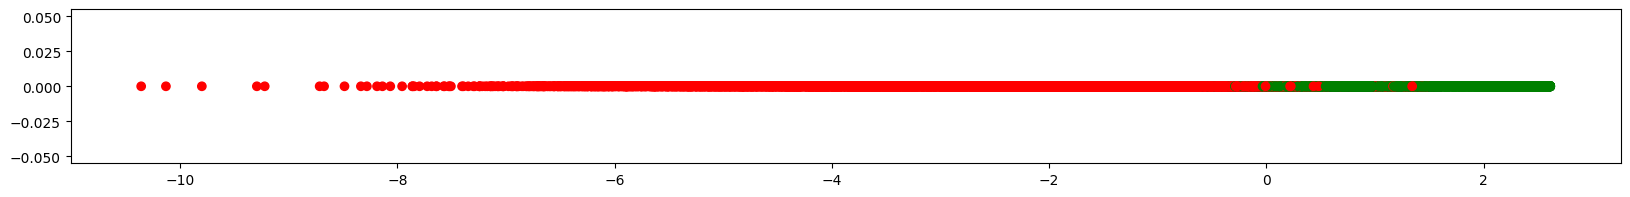

In [12]:
plot_scatter(x=data["PVI"], y=np.zeros_like(data["PVI"]), to_colours=data["correct_yx"], figsize=(20,2))

<Figure size 15360x11520 with 0 Axes>

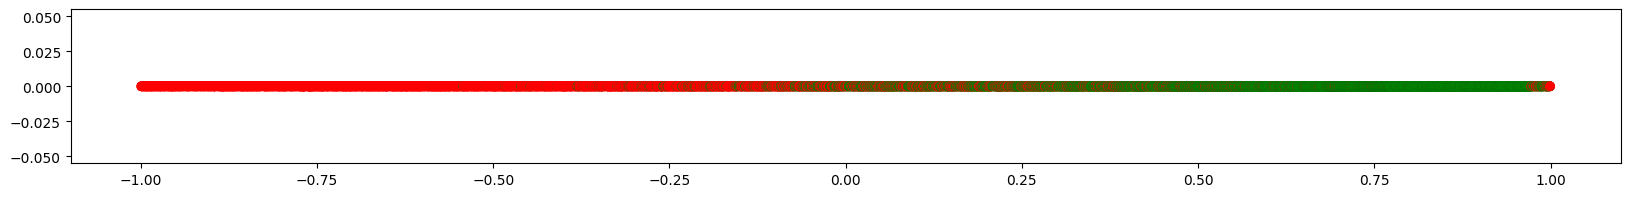

In [13]:
plot_scatter(x=filtered_data3["PVI"], y=np.zeros_like(filtered_data3["PVI"]), to_colours=filtered_data3["correct_yx"], figsize=(20,2))

dev

<Figure size 15360x11520 with 0 Axes>

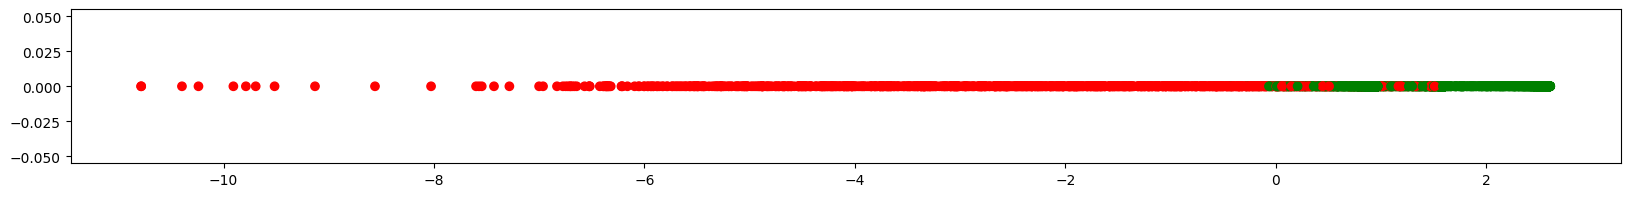

In [17]:
plot_scatter(x=data["PVI"], y=np.zeros_like(data["PVI"]), to_colours=data["correct_yx"], figsize=(20,2))

<Figure size 15360x11520 with 0 Axes>

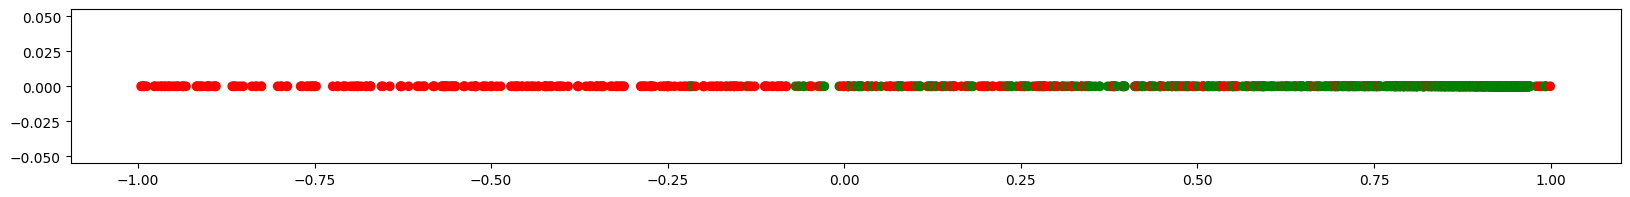

In [19]:
plot_scatter(x=filtered_data3["PVI"], y=np.zeros_like(filtered_data3["PVI"]), to_colours=filtered_data3["correct_yx"], figsize=(20,2))

test

<Figure size 15360x11520 with 0 Axes>

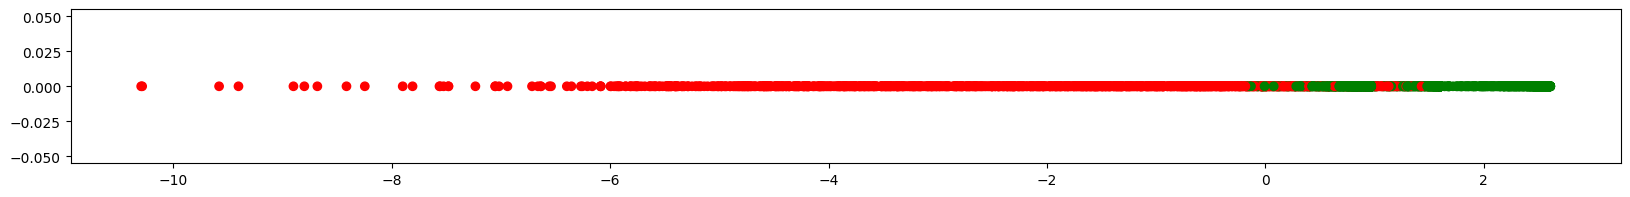

In [23]:
plot_scatter(x=data["PVI"], y=np.zeros_like(data["PVI"]), to_colours=data["correct_yx"], figsize=(20,2))

<Figure size 15360x11520 with 0 Axes>

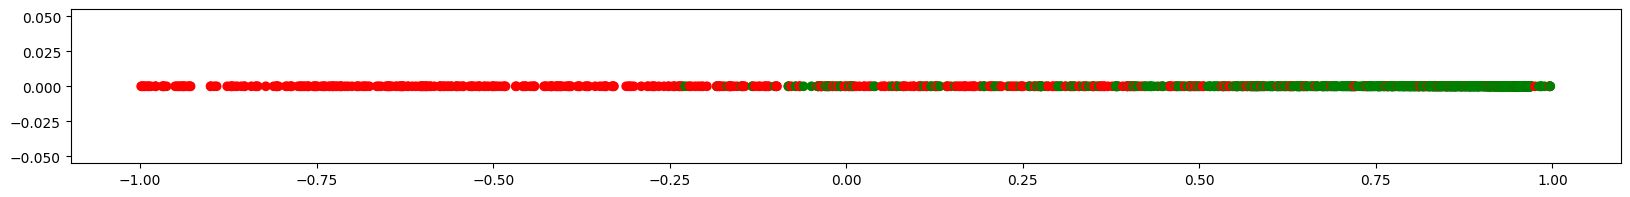

In [24]:
plot_scatter(x=filtered_data3["PVI"], y=np.zeros_like(filtered_data3["PVI"]), to_colours=filtered_data3["correct_yx"], figsize=(20,2))

### Plot Dependency of PVI on predicted score + correlation

In [31]:
def compute_correlation(x, y, method='pearson'):
    return x.corr(y, method=method)

train

In [34]:
compute_correlation(train_data["PVI"], train_data["predicted_score"])

0.23746377403746313

<Figure size 15360x11520 with 0 Axes>

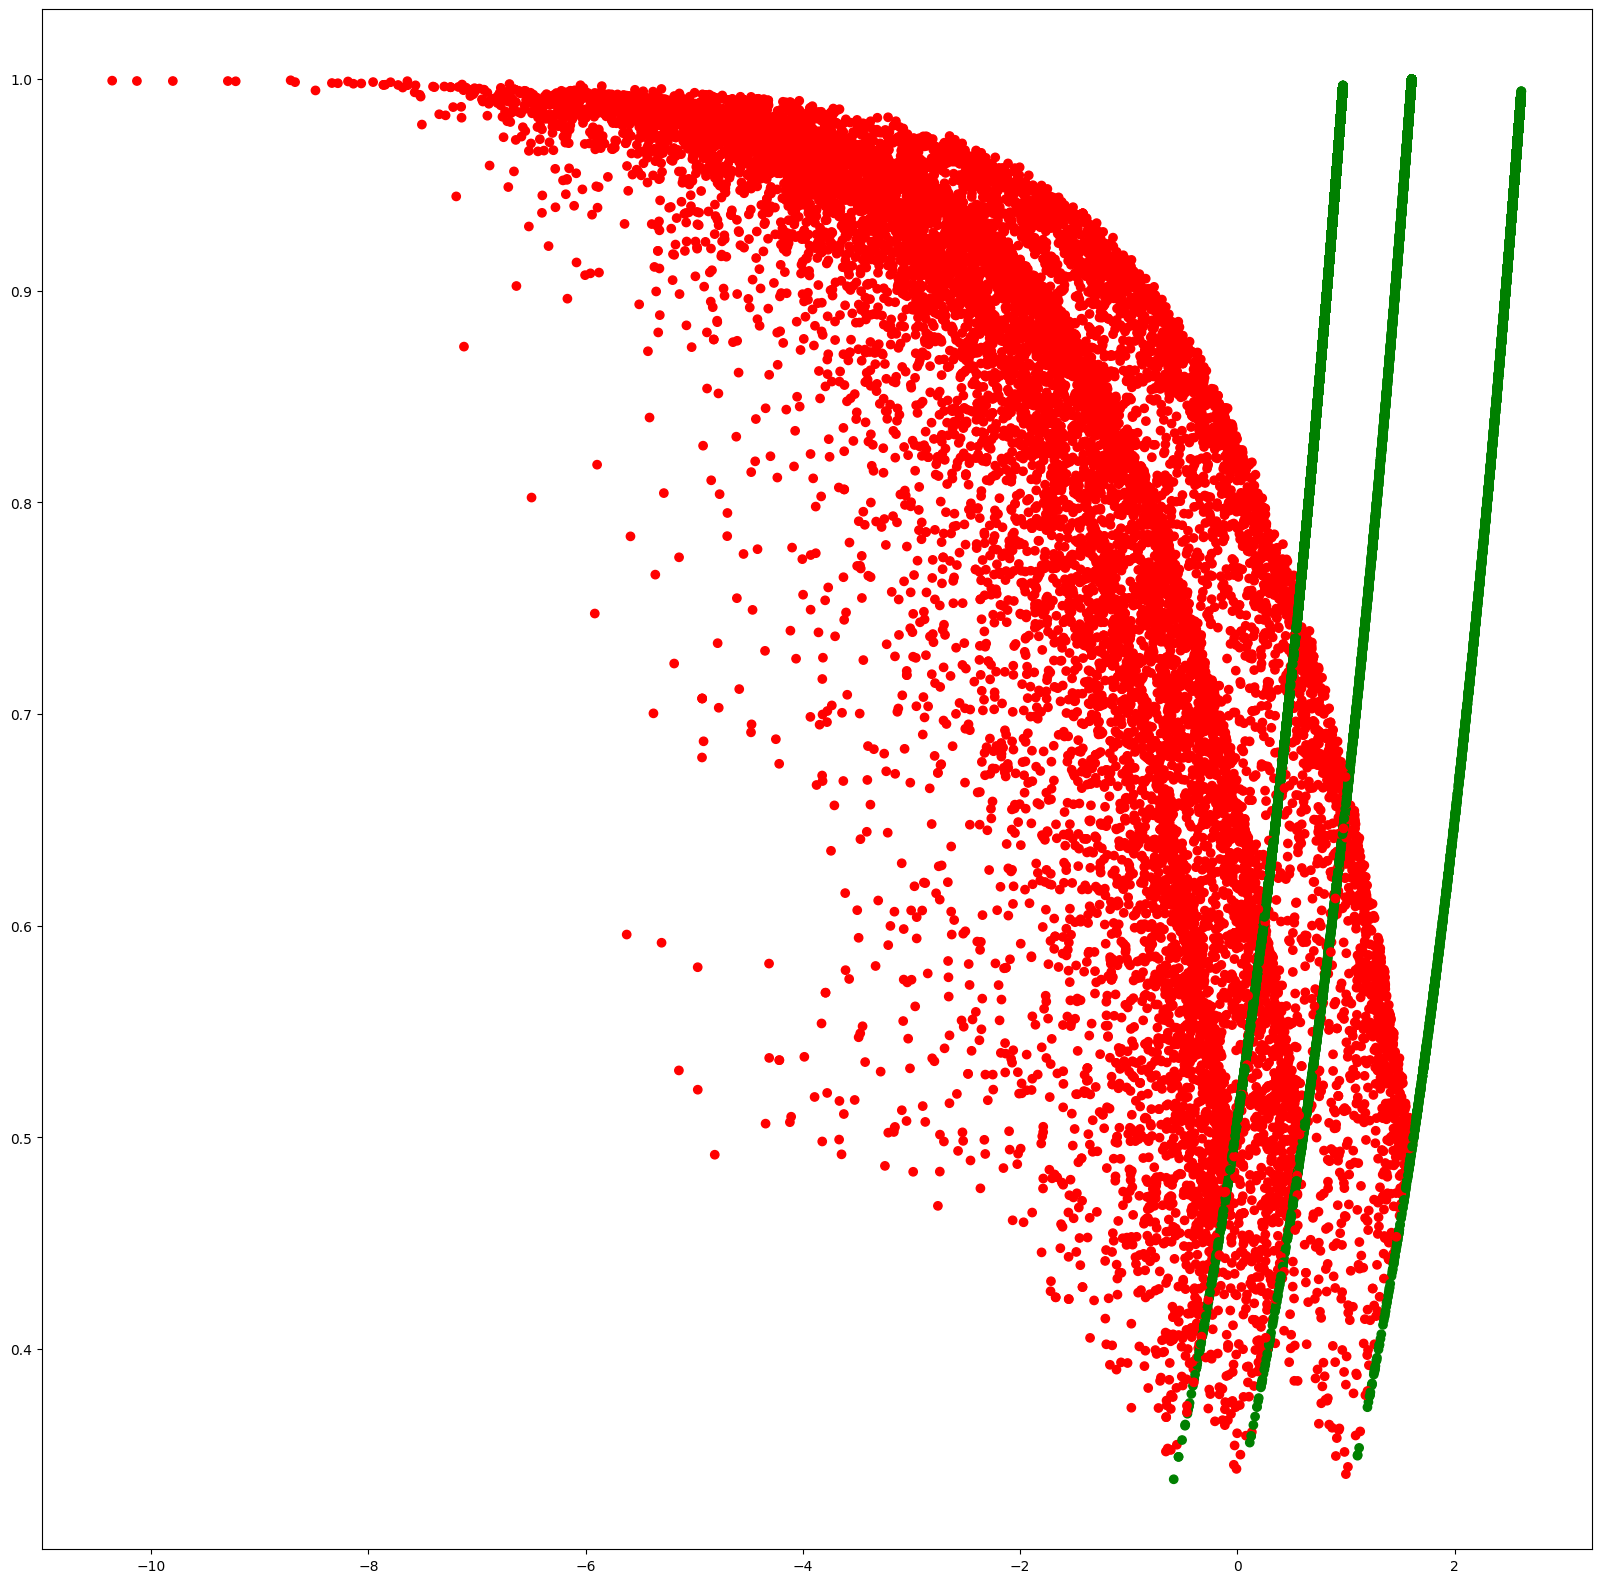

In [29]:
plot_scatter(train_data["PVI"], train_data["predicted_score"], to_colours=train_data['correct_yx'], figsize=(20,20))

dev

In [35]:
compute_correlation(dev_data["PVI"], dev_data["predicted_score"])

0.16933155108225606

<Figure size 15360x11520 with 0 Axes>

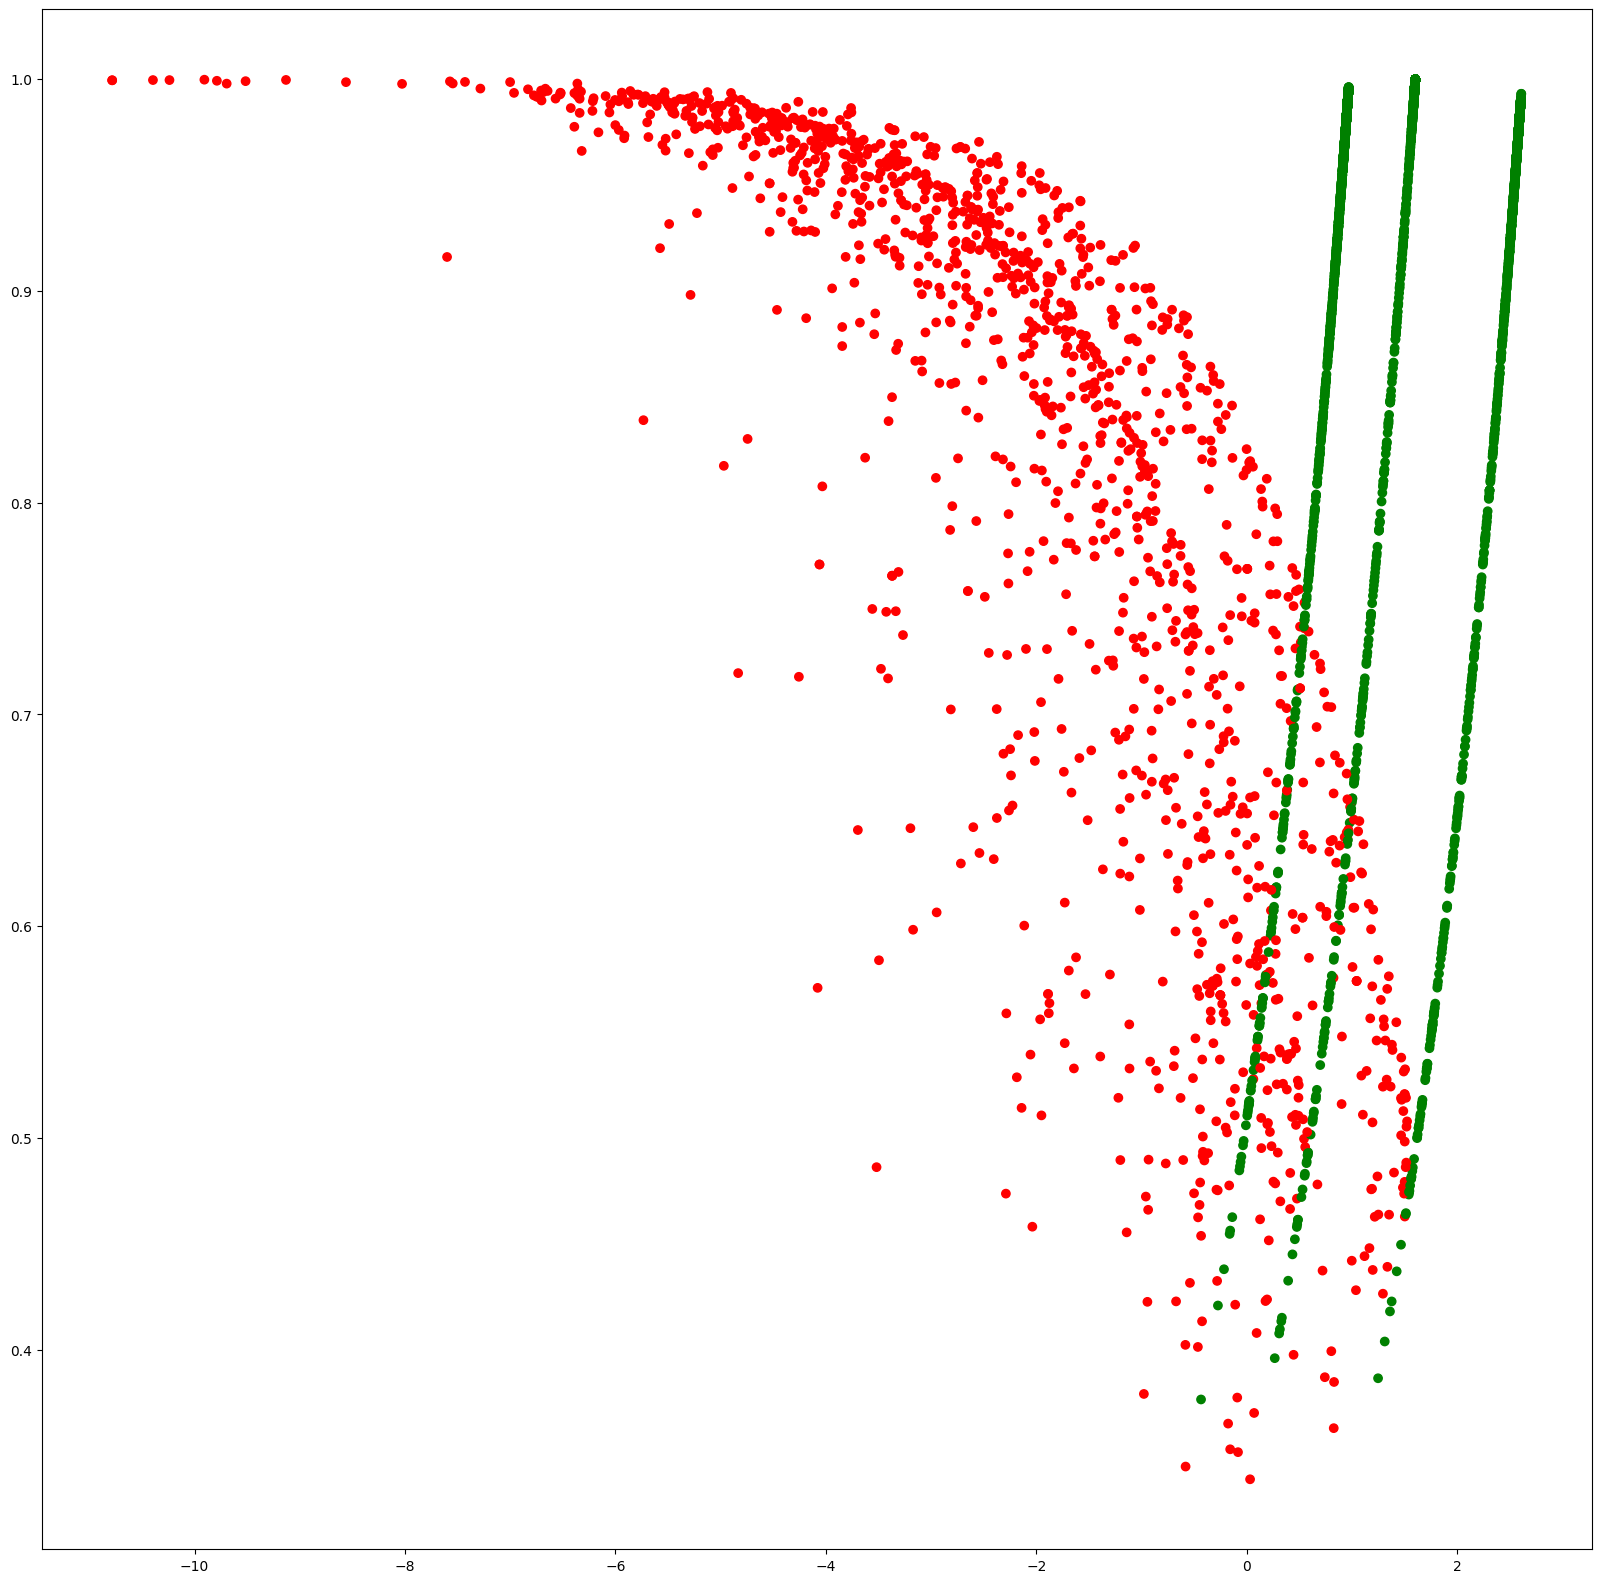

In [30]:
plot_scatter(x=dev_data["PVI"], y=dev_data["predicted_score"], to_colours=dev_data['correct_yx'], figsize=(20,20))

test

In [36]:
compute_correlation(test_data["PVI"], test_data["predicted_score"])

0.19941910583620795

<Figure size 15360x11520 with 0 Axes>

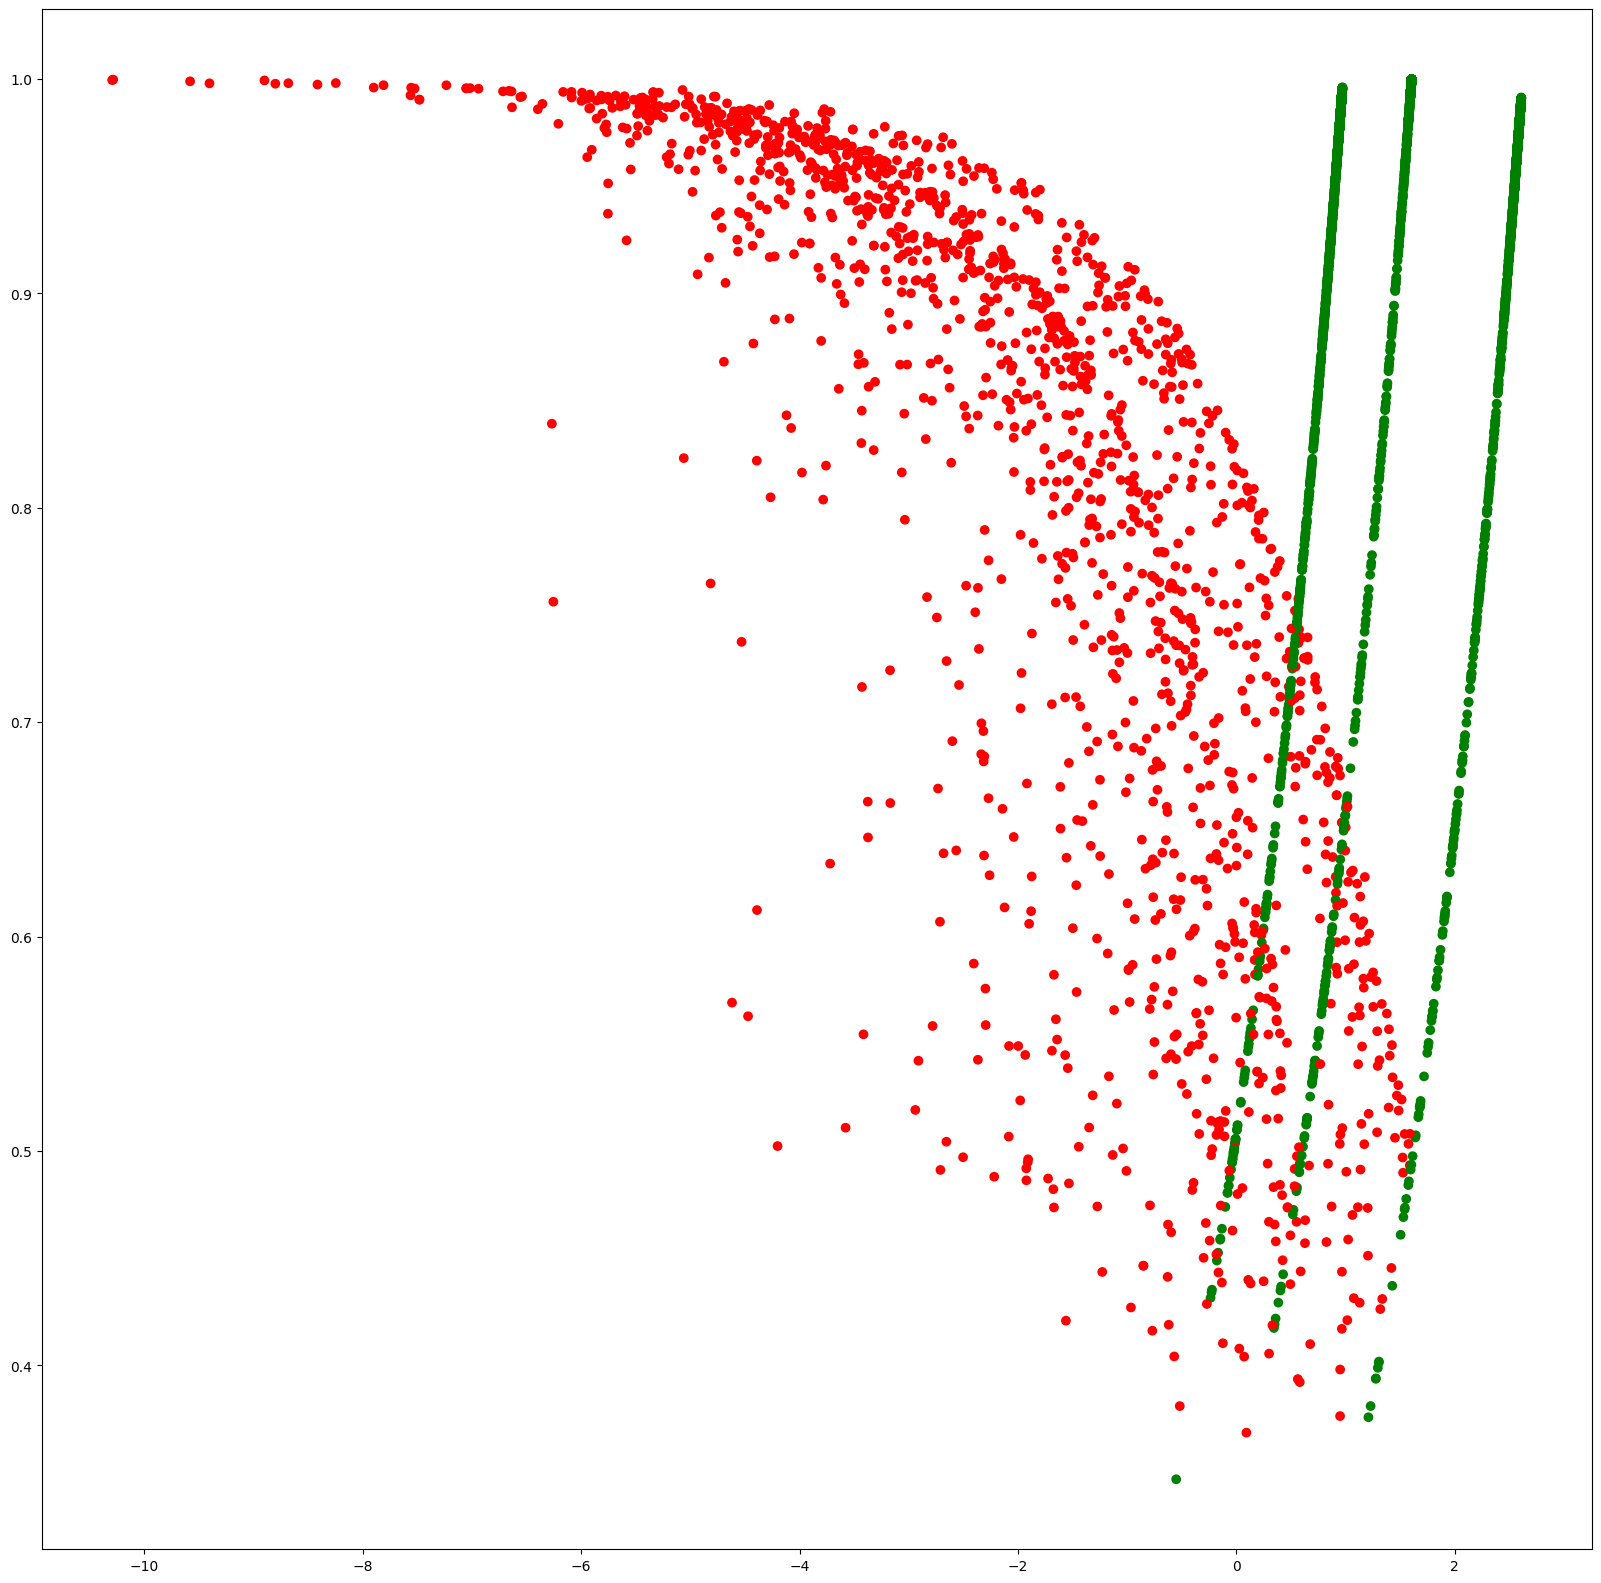

In [28]:
plot_scatter(x=test_data["PVI"], y=test_data["predicted_score"], to_colours=test_data['correct_yx'], figsize=(20,20))

## Analysis with anotated data

### Concat train and dev split (annotated data were chosen from them)

In [4]:
train_dev_data = pd.concat([train_data, dev_data])

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118950 entries, 0 to 118949
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       118950 non-null  int64  
 1   id               118950 non-null  int64  
 2   label            118950 non-null  int64  
 3   claim            118950 non-null  object 
 4   evidence         118950 non-null  object 
 5   sentence1        118950 non-null  object 
 6   sentence2        118950 non-null  object 
 7   H_yb             118950 non-null  float64
 8   H_yx             118950 non-null  float64
 9   correct_yx       118950 non-null  bool   
 10  predicted_label  118950 non-null  int64  
 11  predicted_score  118950 non-null  float64
 12  PVI              118950 non-null  float64
dtypes: bool(1), float64(4), int64(4), object(4)
memory usage: 11.0+ MB


In [39]:
dev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7458 entries, 0 to 7457
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       7458 non-null   int64  
 1   id               7458 non-null   int64  
 2   label            7458 non-null   int64  
 3   claim            7458 non-null   object 
 4   evidence         7458 non-null   object 
 5   sentence1        7458 non-null   object 
 6   sentence2        7458 non-null   object 
 7   H_yb             7458 non-null   float64
 8   H_yx             7458 non-null   float64
 9   correct_yx       7458 non-null   bool   
 10  predicted_label  7458 non-null   int64  
 11  predicted_score  7458 non-null   float64
 12  PVI              7458 non-null   float64
dtypes: bool(1), float64(4), int64(4), object(4)
memory usage: 706.6+ KB


In [40]:
train_dev_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126408 entries, 0 to 7457
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       126408 non-null  int64  
 1   id               126408 non-null  int64  
 2   label            126408 non-null  int64  
 3   claim            126408 non-null  object 
 4   evidence         126408 non-null  object 
 5   sentence1        126408 non-null  object 
 6   sentence2        126408 non-null  object 
 7   H_yb             126408 non-null  float64
 8   H_yx             126408 non-null  float64
 9   correct_yx       126408 non-null  bool   
 10  predicted_label  126408 non-null  int64  
 11  predicted_score  126408 non-null  float64
 12  PVI              126408 non-null  float64
dtypes: bool(1), float64(4), int64(4), object(4)
memory usage: 12.7+ MB


### Remap values

In [6]:
label_dict = {0: "SUPPORTS",
              1: "REFUTES",
              2: "NOT ENOUGH INFO"}

In [7]:
remaped_data = train_dev_data.replace({"predicted_label": label_dict, "label": label_dict})

In [37]:
train_data.replace({"predicted_label": label_dict, "label": label_dict}, inplace=True)

In [38]:
dev_data.replace({"predicted_label": label_dict, "label": label_dict}, inplace=True)

In [39]:
test_data.replace({"predicted_label": label_dict, "label": label_dict}, inplace=True)

In [56]:
remaped_data

Unnamed: 0      id            label  \
0              0   55231          REFUTES   
1              1  225400  NOT ENOUGH INFO   
2              2  184972         SUPPORTS   
3              3  208571         SUPPORTS   
4              4  100075  NOT ENOUGH INFO   
...          ...     ...              ...   
7453        7453  172480  NOT ENOUGH INFO   
7454        7454  216396  NOT ENOUGH INFO   
7455        7455  196982  NOT ENOUGH INFO   
7456        7456  173497  NOT ENOUGH INFO   
7457        7457  126100  NOT ENOUGH INFO   

                                                  claim  \
0                      Mohamed není pro islám důležitý.   
1     Absolute Beginners byla indie kapela založená ...   
2       Yamaha Corporation působí především v Japonsku.   
3            Existuje země, která se jmenuje Indonésie.   
4         Seth Rogen získal vedlejší roli v The Office.   
...                                                 ...   
7453                               Matteo Renzi je Žid.   
7454  Homer Hickman napsal pět nejprodávanějších mem...   
7455       Diwali duchovně znamená světlo nad temnotou.   
7456             Sancho Panza je postava z Jany Eyrové.   
7457  Tim McGraw se zúčastnil premiéry filmu The Bli...   

                                               evidence  \
0     Mohamed. Mohamed (; 25. dubna 571 Mekka – 8. č...   
1     Mod (subkultura). Mod (původně modernist) je s...   
2     Yamaha. Obchodní společnost Yamaha (ヤマハ株式会社 "Y...   
3     Indonésie. Indonésie, plným názvem Indonéská r...   
4     Seth Rogen. Seth Rogen (* 15. dubna 1982, Vanc...   
...                                                 ...   
7453  Matteo Renzi. Matteo Renzi (* 11. ledna 1975, ...   
7454  Homerova definice. Homerova definice (v anglic...   
7455  Sedmá věž. Sedmá věž (anglicky "The Seventh To...   
7456  Zmoudření dona Quijota. Zmoudření Dona Quijota...   
7457  Faith Hill. Faith Hill, rodným jménem Audrey F...   

                                              sentence1  \
0                      Mohamed není pro islám důležitý.   
1     Absolute Beginners byla indie kapela založená ...   
2       Yamaha Corporation působí především v Japonsku.   
3            Existuje země, která se jmenuje Indonésie.   
4         Seth Rogen získal vedlejší roli v The Office.   
...                                                 ...   
7453                               Matteo Renzi je Žid.   
7454  Homer Hickman napsal pět nejprodávanějších mem...   
7455       Diwali duchovně znamená světlo nad temnotou.   
7456             Sancho Panza je postava z Jany Eyrové.   
7457  Tim McGraw se zúčastnil premiéry filmu The Bli...   

                                              sentence2      H_yb      H_yx  \
0     Mohamed. Mohamed (; 25. dubna 571 Mekka – 8. č...  2.620849  0.050512   
1     Mod (subkultura). Mod (původně modernist) je s...  1.603840  0.000850   
2     Yamaha. Obchodní společnost Yamaha (ヤマハ株式会社 "Y...  0.975885  0.046157   
3     Indonésie. Indonésie, plným názvem Indonéská r...  0.975885  0.005154   
4     Seth Rogen. Seth Rogen (* 15. dubna 1982, Vanc...  1.603840  0.121568   
...                                                 ...       ...       ...   
7453  Matteo Renzi. Matteo Renzi (* 11. ledna 1975, ...  1.603840  0.306210   
7454  Homerova definice. Homerova definice (v anglic...  1.603840  0.000993   
7455  Sedmá věž. Sedmá věž (anglicky "The Seventh To...  1.603840  0.000523   
7456  Zmoudření dona Quijota. Zmoudření Dona Quijota...  1.603840  0.001806   
7457  Faith Hill. Faith Hill, rodným jménem Audrey F...  1.603840  0.000364   

      correct_yx  predicted_label  predicted_score       PVI  
0           True          REFUTES         0.965593  2.570337  
1           True  NOT ENOUGH INFO         0.999411  1.602990  
2           True         SUPPORTS         0.968513  0.929728  
3           True         SUPPORTS         0.996434  0.970731  
4           True  NOT ENOUGH INFO         0.919188  1.482272  
...        

In [8]:
remaped_data.rename({"id":"fever_id"}, axis=1, inplace=True)

In [58]:
remaped_data

Unnamed: 0  fever_id            label  \
0              0     55231          REFUTES   
1              1    225400  NOT ENOUGH INFO   
2              2    184972         SUPPORTS   
3              3    208571         SUPPORTS   
4              4    100075  NOT ENOUGH INFO   
...          ...       ...              ...   
7453        7453    172480  NOT ENOUGH INFO   
7454        7454    216396  NOT ENOUGH INFO   
7455        7455    196982  NOT ENOUGH INFO   
7456        7456    173497  NOT ENOUGH INFO   
7457        7457    126100  NOT ENOUGH INFO   

                                                  claim  \
0                      Mohamed není pro islám důležitý.   
1     Absolute Beginners byla indie kapela založená ...   
2       Yamaha Corporation působí především v Japonsku.   
3            Existuje země, která se jmenuje Indonésie.   
4         Seth Rogen získal vedlejší roli v The Office.   
...                                                 ...   
7453                               Matteo Renzi je Žid.   
7454  Homer Hickman napsal pět nejprodávanějších mem...   
7455       Diwali duchovně znamená světlo nad temnotou.   
7456             Sancho Panza je postava z Jany Eyrové.   
7457  Tim McGraw se zúčastnil premiéry filmu The Bli...   

                                               evidence  \
0     Mohamed. Mohamed (; 25. dubna 571 Mekka – 8. č...   
1     Mod (subkultura). Mod (původně modernist) je s...   
2     Yamaha. Obchodní společnost Yamaha (ヤマハ株式会社 "Y...   
3     Indonésie. Indonésie, plným názvem Indonéská r...   
4     Seth Rogen. Seth Rogen (* 15. dubna 1982, Vanc...   
...                                                 ...   
7453  Matteo Renzi. Matteo Renzi (* 11. ledna 1975, ...   
7454  Homerova definice. Homerova definice (v anglic...   
7455  Sedmá věž. Sedmá věž (anglicky "The Seventh To...   
7456  Zmoudření dona Quijota. Zmoudření Dona Quijota...   
7457  Faith Hill. Faith Hill, rodným jménem Audrey F...   

                                              sentence1  \
0                      Mohamed není pro islám důležitý.   
1     Absolute Beginners byla indie kapela založená ...   
2       Yamaha Corporation působí především v Japonsku.   
3            Existuje země, která se jmenuje Indonésie.   
4         Seth Rogen získal vedlejší roli v The Office.   
...                                                 ...   
7453                               Matteo Renzi je Žid.   
7454  Homer Hickman napsal pět nejprodávanějších mem...   
7455       Diwali duchovně znamená světlo nad temnotou.   
7456             Sancho Panza je postava z Jany Eyrové.   
7457  Tim McGraw se zúčastnil premiéry filmu The Bli...   

                                              sentence2      H_yb      H_yx  \
0     Mohamed. Mohamed (; 25. dubna 571 Mekka – 8. č...  2.620849  0.050512   
1     Mod (subkultura). Mod (původně modernist) je s...  1.603840  0.000850   
2     Yamaha. Obchodní společnost Yamaha (ヤマハ株式会社 "Y...  0.975885  0.046157   
3     Indonésie. Indonésie, plným názvem Indonéská r...  0.975885  0.005154   
4     Seth Rogen. Seth Rogen (* 15. dubna 1982, Vanc...  1.603840  0.121568   
...                                                 ...       ...       ...   
7453  Matteo Renzi. Matteo Renzi (* 11. ledna 1975, ...  1.603840  0.306210   
7454  Homerova definice. Homerova definice (v anglic...  1.603840  0.000993   
7455  Sedmá věž. Sedmá věž (anglicky "The Seventh To...  1.603840  0.000523   
7456  Zmoudření dona Quijota. Zmoudření Dona Quijota...  1.603840  0.001806   
7457  Faith Hill. Faith Hill, rodným jménem Audrey F...  1.603840  0.000364   

      correct_yx  predicted_label  predicted_score       PVI  
0           True          REFUTES         0.965593  2.570337  
1           True  NOT ENOUGH INFO         0.999411  1.602990  
2           True         SUPPORTS         0.968513  0.929728  
3           True         SUPPORTS         0.996434  0.970731  
4           True  NOT ENOUGH INFO         0.919188

### Load annotated data

In [9]:
annotated_data = pd.read_csv("data/annotated_fcheck/fever_pair_1%_annotated.csv", delimiter=";")
#annotated_data = pd.read_csv("/home/mlynatom/data/annotated_fcheck/fever_pair_200_closest_annotated.csv", delimiter=";")
#annotated_data = pd.read_csv("/home/mlynatom/data/annotated_fcheck/fever_pair.csv", delimiter=";")

In [119]:
annotated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1283 entries, 0 to 1282
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1283 non-null   int64  
 1   fever_id     1283 non-null   int64  
 2   claim        1283 non-null   object 
 3   claim_cs     1283 non-null   object 
 4   evidence     1283 non-null   object 
 5   evidence_cs  1283 non-null   object 
 6   label        1283 non-null   object 
 7   label_cs     1283 non-null   object 
 8   checked_by   1283 non-null   int64  
 9   created_at   0 non-null      float64
 10  updated_at   1283 non-null   int64  
 11  random       0 non-null      float64
dtypes: float64(2), int64(4), object(6)
memory usage: 120.4+ KB


In [10]:
annotated_data.head()

id  fever_id                                              claim  \
0   1     20036  Paul McCartney is a two-time inductee into the...   
1   2     17792                Warren Buffett is a philanthropist.   
2   3     72323                   Woody Allen has won four Oscars.   
3   4     41890  Cells are fundamental units of structure and f...   
4   5     58083             Batman is exceptionally unintelligent.   

                                            claim_cs  \
0  Paul McCartney byl dvakrát uveden do Rock'n'ro...   
1                       Warren Buffett je filantrop.   
2                   Woody Allen získal čtyři Oscary.   
3   Buňky jsou základní jednotky struktury a funkce.   
4                Batman je výjimečně neinteligentní.   

                              evidence  \
0              [["Paul McCartney", 9]]   
1              [["Warren Buffett", 0]]   
2  [["Woody Allen", 17], ["Oscar", 0]]   
3                      [["Buňka", 12]]   
4                     [["Batman", 11]]   

                                         evidence_cs     label       label_cs  \
0  {"Paul McCartney": "Sir James Paul McCartney C...  SUPPORTS  MISTRANSLATED   
1  {"Warren Buffett": "Warren Edward Buffett, \n\...  SUPPORTS       SUPPORTS   
2  {"Oscar": "Oscar, jinak také Cena Akademie (an...  SUPPORTS       SUPPORTS   
3  {"Buňka": "Buňka (lat. \"cellula\") je základn...  SUPPORTS       SUPPORTS   
4  {"Batman": "Batman je komiksová postava, stvoř...   REFUTES        REFUTES   

   checked_by  created_at  updated_at  random  
0         350         NaN  1676294555     NaN  
1         350         NaN  1676549803     NaN  
2         350         NaN  1676293747     NaN  
3         350         NaN  1676550363     NaN  
4         350         NaN  1676468199     NaN

### Merge human_labels

In [11]:
merged_data = pd.merge(remaped_data, annotated_data[["fever_id", "label_cs"]], on="fever_id", how="inner")

In [14]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1421 entries, 0 to 1420
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1421 non-null   int64  
 1   fever_id         1421 non-null   int64  
 2   fever_label      1421 non-null   object 
 3   claim            1421 non-null   object 
 4   evidence         1421 non-null   object 
 5   sentence1        1421 non-null   object 
 6   sentence2        1421 non-null   object 
 7   H_yb             1421 non-null   float64
 8   H_yx             1421 non-null   float64
 9   correct_yx       1421 non-null   bool   
 10  predicted_label  1421 non-null   object 
 11  predicted_score  1421 non-null   float64
 12  PVI              1421 non-null   float64
 13  human_label      1421 non-null   object 
dtypes: bool(1), float64(4), int64(2), object(7)
memory usage: 156.8+ KB


In [123]:
merged_data

Unnamed: 0  fever_id     label  \
0            232     31047  SUPPORTS   
1          26640     31047  SUPPORTS   
2          55985     31047  SUPPORTS   
3          82485     31047  SUPPORTS   
4          90146     31047  SUPPORTS   
...          ...       ...       ...   
1416        7146    131728   REFUTES   
1417        7262    139714   REFUTES   
1418        7372    119516  SUPPORTS   
1419        7400      9718  SUPPORTS   
1420        7423     76870  SUPPORTS   

                                                  claim  \
0            Středozemě je oblast, odkud pochází Gimli.   
1            Středozemě je oblast, odkud pochází Gimli.   
2            Středozemě je oblast, odkud pochází Gimli.   
3            Středozemě je oblast, odkud pochází Gimli.   
4            Středozemě je oblast, odkud pochází Gimli.   
...                                                 ...   
1416  Gal Gadot byla zařazena za Shlomit Malka jako ...   
1417         Star Trek: Discovery je prequel ke knihám.   
1418                   Bret Easton Ellis napsal scénář.   
1419            Leonard Nimoy namluvil počítačovou hru.   
1420                              Bhagat Singh byl Ind.   

                                               evidence  \
0     Gimli. Gimli (narozen 2879 Třetího věku) je tr...   
1     Gimli. Gimli (narozen 2879 Třetího věku) je tr...   
2     Gimli. Gimli (narozen 2879 Třetího věku) je tr...   
3     Gimli. Gimli (narozen 2879 Třetího věku) je tr...   
4     Gimli. Gimli (narozen 2879 Třetího věku) je tr...   
...                                                 ...   
1416  Gal Gadotová. Gal Gadotová (Gal Gadot-Varsano,...   
1417  Star Trek. Star Trek je americká mediální řada...   
1418  Bret Easton Ellis. Bret Easton Ellis (* 7. bře...   
1419  Leonard Nimoy. Leonard Simon Nimoy (26. března...   
1420  Bhagat Singh. Bhagat Singh (27. září 1907 - 23...   

                                              sentence1  \
0            Středozemě je oblast, odkud pochází Gimli.   
1            Středozemě je oblast, odkud pochází Gimli.   
2            Středozemě je oblast, odkud pochází Gimli.   
3            Středozemě je oblast, odkud pochází Gimli.   
4            Středozemě je oblast, odkud pochází Gimli.   
...                                                 ...   
1416  Gal Gadot byla zařazena za Shlomit Malka jako ...   
1417         Star Trek: Discovery je prequel ke knihám.   
1418                   Bret Easton Ellis napsal scénář.   
1419            Leonard Nimoy namluvil počítačovou hru.   
1420                              Bhagat Singh byl Ind.   

                                              sentence2      H_yb      H_yx  \
0     Gimli. Gimli (narozen 2879 Třetího věku) je tr...  0.975885  0.009571   
1     Gimli. Gimli (narozen 2879 Třetího věku) je tr...  0.975885  0.009571   
2     Gimli. Gimli (narozen 2879 Třetího věku) je tr...  0.975885  0.009571   
3     Gimli. Gimli (narozen 2879 Třetího věku) je tr...  0.975885  0.009571   
4     Gimli. Gimli (narozen 2879 Třetího věku) je tr...  0.975885  0.009571   
...                                                 ...       ...       ...   
1416  Gal Gadotová. Gal Gadotová (Gal Gadot-Varsano,...  2.620849  3.173844   
1417  Star Trek. Star Trek je americká mediální řada...  2.620849  7.499441   
1418  Bret Easton Ellis. Bret Easton Ellis (* 7. bře...  0.975885  0.119395   
1419  Leonard Nimoy. Leonard Simon Nimoy (26. března...  0.975885  0.021641   
1420  Bhagat Singh. Bhagat Singh (27. září 1907 - 23...  0.975885  0.046809   

      correct_yx  predicted_label  predicted_score       PVI         label_cs  
0           True         SUPPORTS         0.993388  0.966315         SUPPORTS  
1           True         SUPPORTS         0.993388  0.966315         SUPPORTS  
2           True         SUPPORTS         0.993388  0.966315         SUPPORTS  
3           True         SUPPORTS         0.993388  0.966315         SUPPORTS  
4           True         SUPPORTS         0.99338

### Rename columns to follow convention

fever_label = original label in FEVER dataset

predicted_label = label predicted originally by the model

human_label = label given by a human annotator (considered to be a gold label)

In [15]:
merged_data.rename({"label":"fever_label", "label_cs": "human_label"}, axis=1, inplace=True)

In [33]:
train_data.rename({"label":"fever_label", "label_cs": "human_label"}, axis=1, inplace=True)

In [34]:
dev_data.rename({"label":"fever_label", "label_cs": "human_label"}, axis=1, inplace=True)

In [35]:
test_data.rename({"label":"fever_label", "label_cs": "human_label"}, axis=1, inplace=True)

In [125]:
merged_data

Unnamed: 0  fever_id fever_label  \
0            232     31047    SUPPORTS   
1          26640     31047    SUPPORTS   
2          55985     31047    SUPPORTS   
3          82485     31047    SUPPORTS   
4          90146     31047    SUPPORTS   
...          ...       ...         ...   
1416        7146    131728     REFUTES   
1417        7262    139714     REFUTES   
1418        7372    119516    SUPPORTS   
1419        7400      9718    SUPPORTS   
1420        7423     76870    SUPPORTS   

                                                  claim  \
0            Středozemě je oblast, odkud pochází Gimli.   
1            Středozemě je oblast, odkud pochází Gimli.   
2            Středozemě je oblast, odkud pochází Gimli.   
3            Středozemě je oblast, odkud pochází Gimli.   
4            Středozemě je oblast, odkud pochází Gimli.   
...                                                 ...   
1416  Gal Gadot byla zařazena za Shlomit Malka jako ...   
1417         Star Trek: Discovery je prequel ke knihám.   
1418                   Bret Easton Ellis napsal scénář.   
1419            Leonard Nimoy namluvil počítačovou hru.   
1420                              Bhagat Singh byl Ind.   

                                               evidence  \
0     Gimli. Gimli (narozen 2879 Třetího věku) je tr...   
1     Gimli. Gimli (narozen 2879 Třetího věku) je tr...   
2     Gimli. Gimli (narozen 2879 Třetího věku) je tr...   
3     Gimli. Gimli (narozen 2879 Třetího věku) je tr...   
4     Gimli. Gimli (narozen 2879 Třetího věku) je tr...   
...                                                 ...   
1416  Gal Gadotová. Gal Gadotová (Gal Gadot-Varsano,...   
1417  Star Trek. Star Trek je americká mediální řada...   
1418  Bret Easton Ellis. Bret Easton Ellis (* 7. bře...   
1419  Leonard Nimoy. Leonard Simon Nimoy (26. března...   
1420  Bhagat Singh. Bhagat Singh (27. září 1907 - 23...   

                                              sentence1  \
0            Středozemě je oblast, odkud pochází Gimli.   
1            Středozemě je oblast, odkud pochází Gimli.   
2            Středozemě je oblast, odkud pochází Gimli.   
3            Středozemě je oblast, odkud pochází Gimli.   
4            Středozemě je oblast, odkud pochází Gimli.   
...                                                 ...   
1416  Gal Gadot byla zařazena za Shlomit Malka jako ...   
1417         Star Trek: Discovery je prequel ke knihám.   
1418                   Bret Easton Ellis napsal scénář.   
1419            Leonard Nimoy namluvil počítačovou hru.   
1420                              Bhagat Singh byl Ind.   

                                              sentence2      H_yb      H_yx  \
0     Gimli. Gimli (narozen 2879 Třetího věku) je tr...  0.975885  0.009571   
1     Gimli. Gimli (narozen 2879 Třetího věku) je tr...  0.975885  0.009571   
2     Gimli. Gimli (narozen 2879 Třetího věku) je tr...  0.975885  0.009571   
3     Gimli. Gimli (narozen 2879 Třetího věku) je tr...  0.975885  0.009571   
4     Gimli. Gimli (narozen 2879 Třetího věku) je tr...  0.975885  0.009571   
...                                                 ...       ...       ...   
1416  Gal Gadotová. Gal Gadotová (Gal Gadot-Varsano,...  2.620849  3.173844   
1417  Star Trek. Star Trek je americká mediální řada...  2.620849  7.499441   
1418  Bret Easton Ellis. Bret Easton Ellis (* 7. bře...  0.975885  0.119395   
1419  Leonard Nimoy. Leonard Simon Nimoy (26. března...  0.975885  0.021641   
1420  Bhagat Singh. Bhagat Singh (27. září 1907 - 23...  0.975885  0.046809   

      correct_yx  predicted_label  predicted_score       PVI      human_label  
0           True         SUPPORTS         0.993388  0.966315         SUPPORTS  
1           True         SUPPORTS         0.993388  0.966315         SUPPORTS  
2           True         SUPPORTS         0.993388  0.966315         SUPPORTS  
3           True         SUPPORTS         0.993388  0.966315         SUPPORTS  
4           True         

### Plot MISTRANSLATED

<Figure size 15360x11520 with 0 Axes>

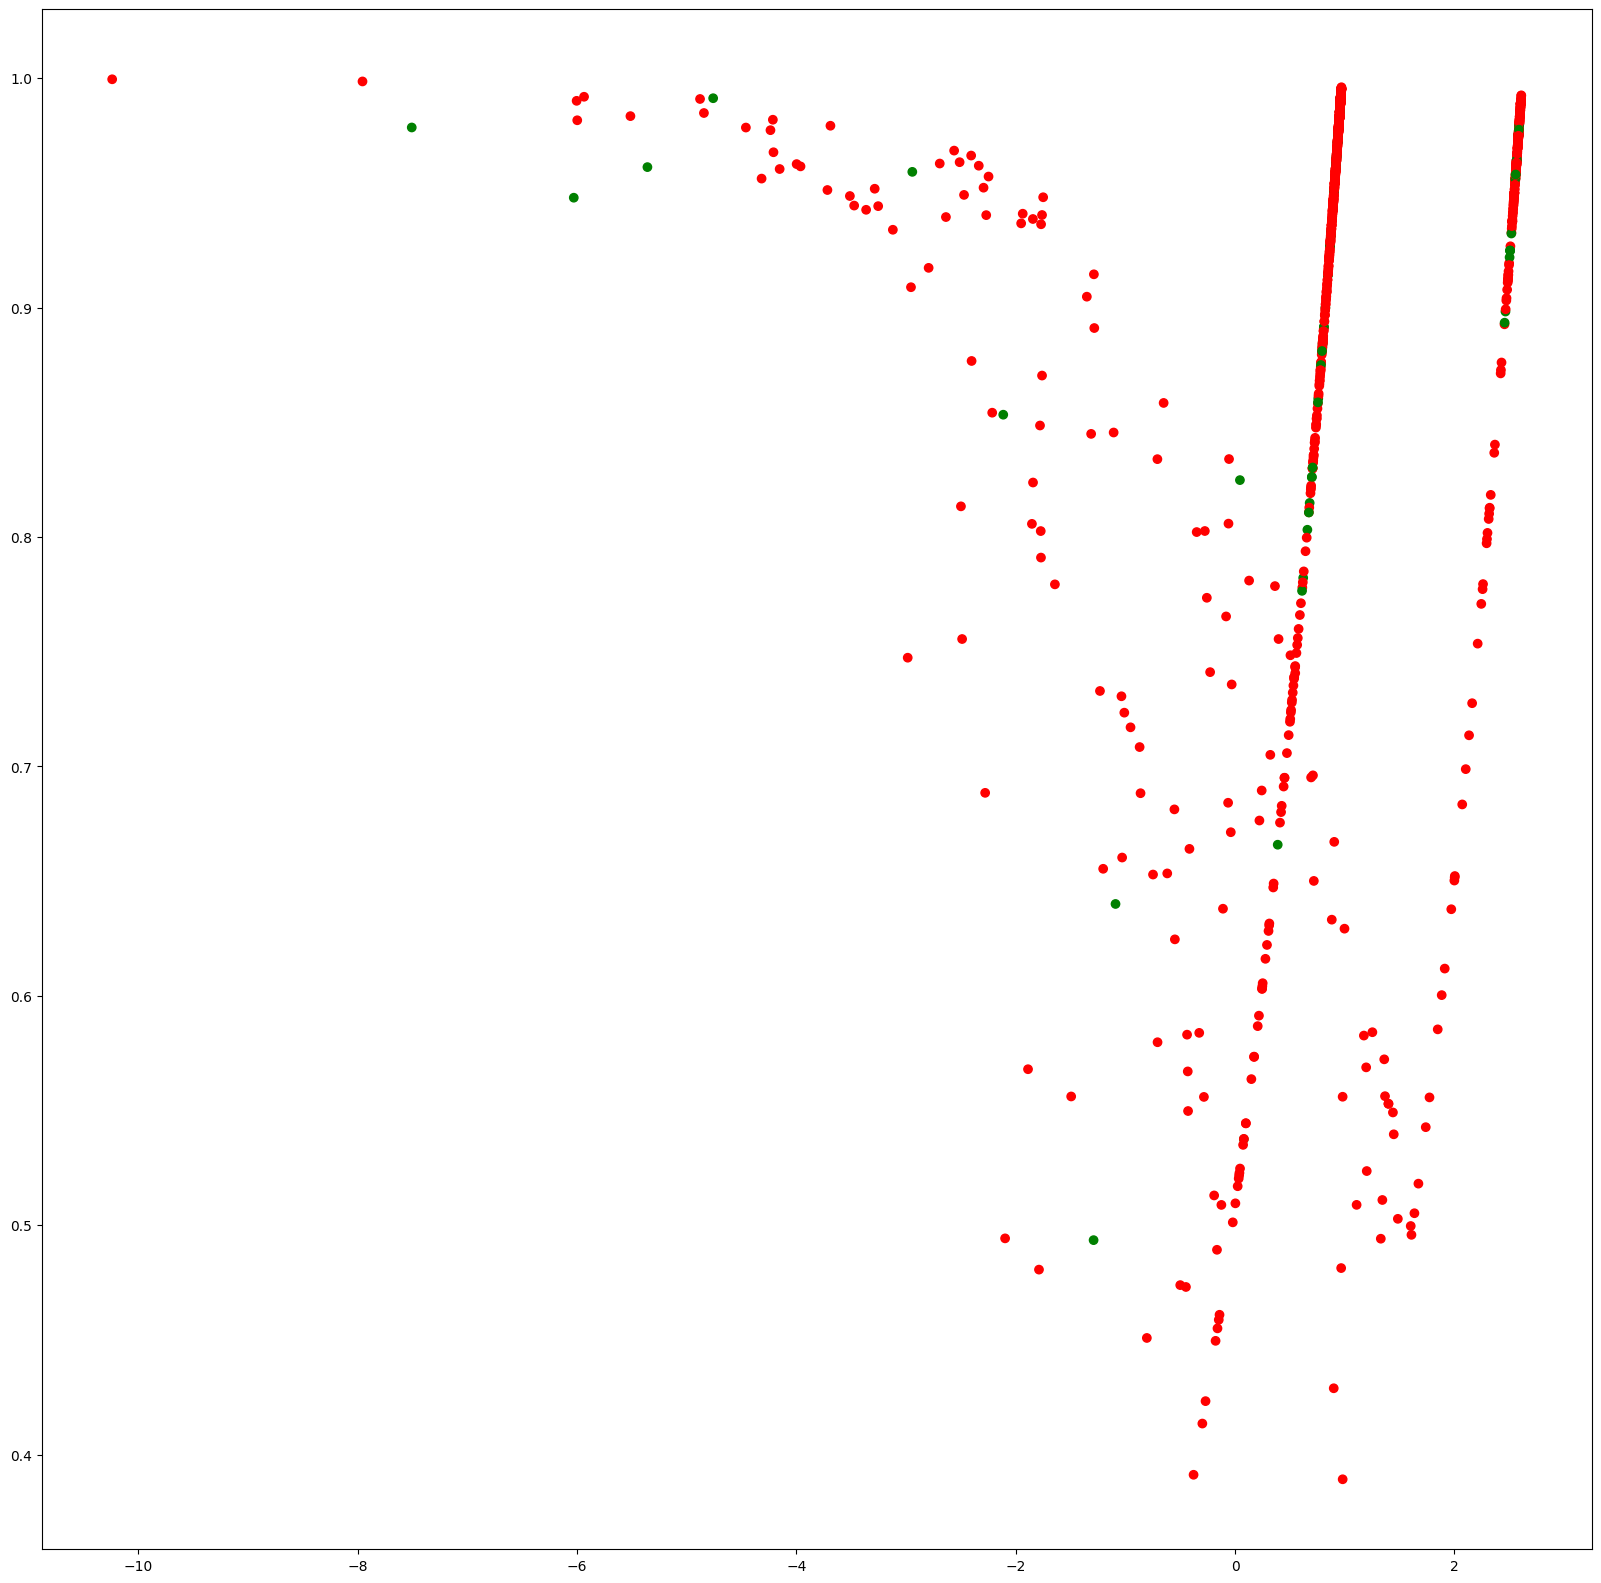

In [126]:
plot_scatter(x=merged_data["PVI"], y=merged_data["predicted_score"], to_colours=merged_data.apply(lambda x: x.human_label == "MISTRANSLATED", axis=1), figsize=(20,20))

### Change MISTRANSLATED to NOT ENOUGH INFO

In [16]:
merged_data.replace({"human_label": {"MISTRANSLATED": "NOT ENOUGH INFO"}}, inplace=True)

In [17]:
np.unique(merged_data.human_label.to_numpy())

array(['NOT ENOUGH INFO', 'REFUTES', 'SUPPORTS'], dtype=object)

### Compute and plot correlation

create colors

In [108]:
merged_data["all_matches"] = merged_data.apply(lambda x: x.fever_label == x.predicted_label == x.human_label, axis=1)

In [109]:
merged_data["no_matches"] = merged_data.apply(lambda x: x.fever_label != x.predicted_label and x.fever_label != x.human_label, axis=1)

In [110]:
merged_data["fever_predicted_matches"] = merged_data.apply(lambda x: x.fever_label == x.predicted_label and x.fever_label != x.human_label, axis=1)

In [111]:
merged_data["human_predicted_matches"] = merged_data.apply(lambda x: x.human_label == x.predicted_label and x.fever_label != x.human_label, axis=1)

In [112]:
merged_data["human_fever_matches"] = merged_data.apply(lambda x: x.human_label == x.fever_label and x.fever_label != x.predicted_label, axis=1)

In [113]:
def color_column(x):
    if x.all_matches:
        return "green"
    elif x.no_matches:
        return "red"
    elif x.fever_predicted_matches:
        return "blue"
    elif x.human_predicted_matches:
        return "pink"
    elif x.human_fever_matches:
        return "orange"

In [114]:
merged_data["colors"] = merged_data.apply(color_column, axis=1)

In [115]:
merged_data

Unnamed: 0  fever_id fever_label  \
0            232     31047    SUPPORTS   
1          26640     31047    SUPPORTS   
2          55985     31047    SUPPORTS   
3          82485     31047    SUPPORTS   
4          90146     31047    SUPPORTS   
...          ...       ...         ...   
1416        7146    131728     REFUTES   
1417        7262    139714     REFUTES   
1418        7372    119516    SUPPORTS   
1419        7400      9718    SUPPORTS   
1420        7423     76870    SUPPORTS   

                                                  claim  \
0            Středozemě je oblast, odkud pochází Gimli.   
1            Středozemě je oblast, odkud pochází Gimli.   
2            Středozemě je oblast, odkud pochází Gimli.   
3            Středozemě je oblast, odkud pochází Gimli.   
4            Středozemě je oblast, odkud pochází Gimli.   
...                                                 ...   
1416  Gal Gadot byla zařazena za Shlomit Malka jako ...   
1417         Star Trek: Discovery je prequel ke knihám.   
1418                   Bret Easton Ellis napsal scénář.   
1419            Leonard Nimoy namluvil počítačovou hru.   
1420                              Bhagat Singh byl Ind.   

                                               evidence  \
0     Gimli. Gimli (narozen 2879 Třetího věku) je tr...   
1     Gimli. Gimli (narozen 2879 Třetího věku) je tr...   
2     Gimli. Gimli (narozen 2879 Třetího věku) je tr...   
3     Gimli. Gimli (narozen 2879 Třetího věku) je tr...   
4     Gimli. Gimli (narozen 2879 Třetího věku) je tr...   
...                                                 ...   
1416  Gal Gadotová. Gal Gadotová (Gal Gadot-Varsano,...   
1417  Star Trek. Star Trek je americká mediální řada...   
1418  Bret Easton Ellis. Bret Easton Ellis (* 7. bře...   
1419  Leonard Nimoy. Leonard Simon Nimoy (26. března...   
1420  Bhagat Singh. Bhagat Singh (27. září 1907 - 23...   

                                              sentence1  \
0            Středozemě je oblast, odkud pochází Gimli.   
1            Středozemě je oblast, odkud pochází Gimli.   
2            Středozemě je oblast, odkud pochází Gimli.   
3            Středozemě je oblast, odkud pochází Gimli.   
4            Středozemě je oblast, odkud pochází Gimli.   
...                                                 ...   
1416  Gal Gadot byla zařazena za Shlomit Malka jako ...   
1417         Star Trek: Discovery je prequel ke knihám.   
1418                   Bret Easton Ellis napsal scénář.   
1419            Leonard Nimoy namluvil počítačovou hru.   
1420                              Bhagat Singh byl Ind.   

                                              sentence2      H_yb      H_yx  \
0     Gimli. Gimli (narozen 2879 Třetího věku) je tr...  0.975885  0.009571   
1     Gimli. Gimli (narozen 2879 Třetího věku) je tr...  0.975885  0.009571   
2     Gimli. Gimli (narozen 2879 Třetího věku) je tr...  0.975885  0.009571   
3     Gimli. Gimli (narozen 2879 Třetího věku) je tr...  0.975885  0.009571   
4     Gimli. Gimli (narozen 2879 Třetího věku) je tr...  0.975885  0.009571   
...                                                 ...       ...       ...   
1416  Gal Gadotová. Gal Gadotová (Gal Gadot-Varsano,...  2.620849  3.173844   
1417  Star Trek. Star Trek je americká mediální řada...  2.620849  7.499441   
1418  Bret Easton Ellis. Bret Easton Ellis (* 7. bře...  0.975885  0.119395   
1419  Leonard Nimoy. Leonard Simon Nimoy (26. března...  0.975885  0.021641   
1420  Bhagat Singh. Bhagat Singh (27. září 1907 - 23...  0.975885  0.046809   

      correct_yx  predicted_label  predicted_score       PVI      human_label  \
0           True         SUPPORTS         0.993388  0.966315         SUPPORTS   
1           True         SUPPORTS         0.993388  0.966315         SUPPORTS   
2           True         SUPPORTS         0.993388  0.966315         SUPPORTS   
3           True         SUPPORTS         0.993388  0.966315         SUPPORTS   
4           True    

In [116]:
np.unique(merged_data["colors"].to_numpy(), return_counts=True)

(array(['blue', 'green', 'orange', 'red'], dtype=object),
 array([392, 884,  62,  83]))

relation between mislabeled (from human_labels) and PVI

<Figure size 15360x11520 with 0 Axes>

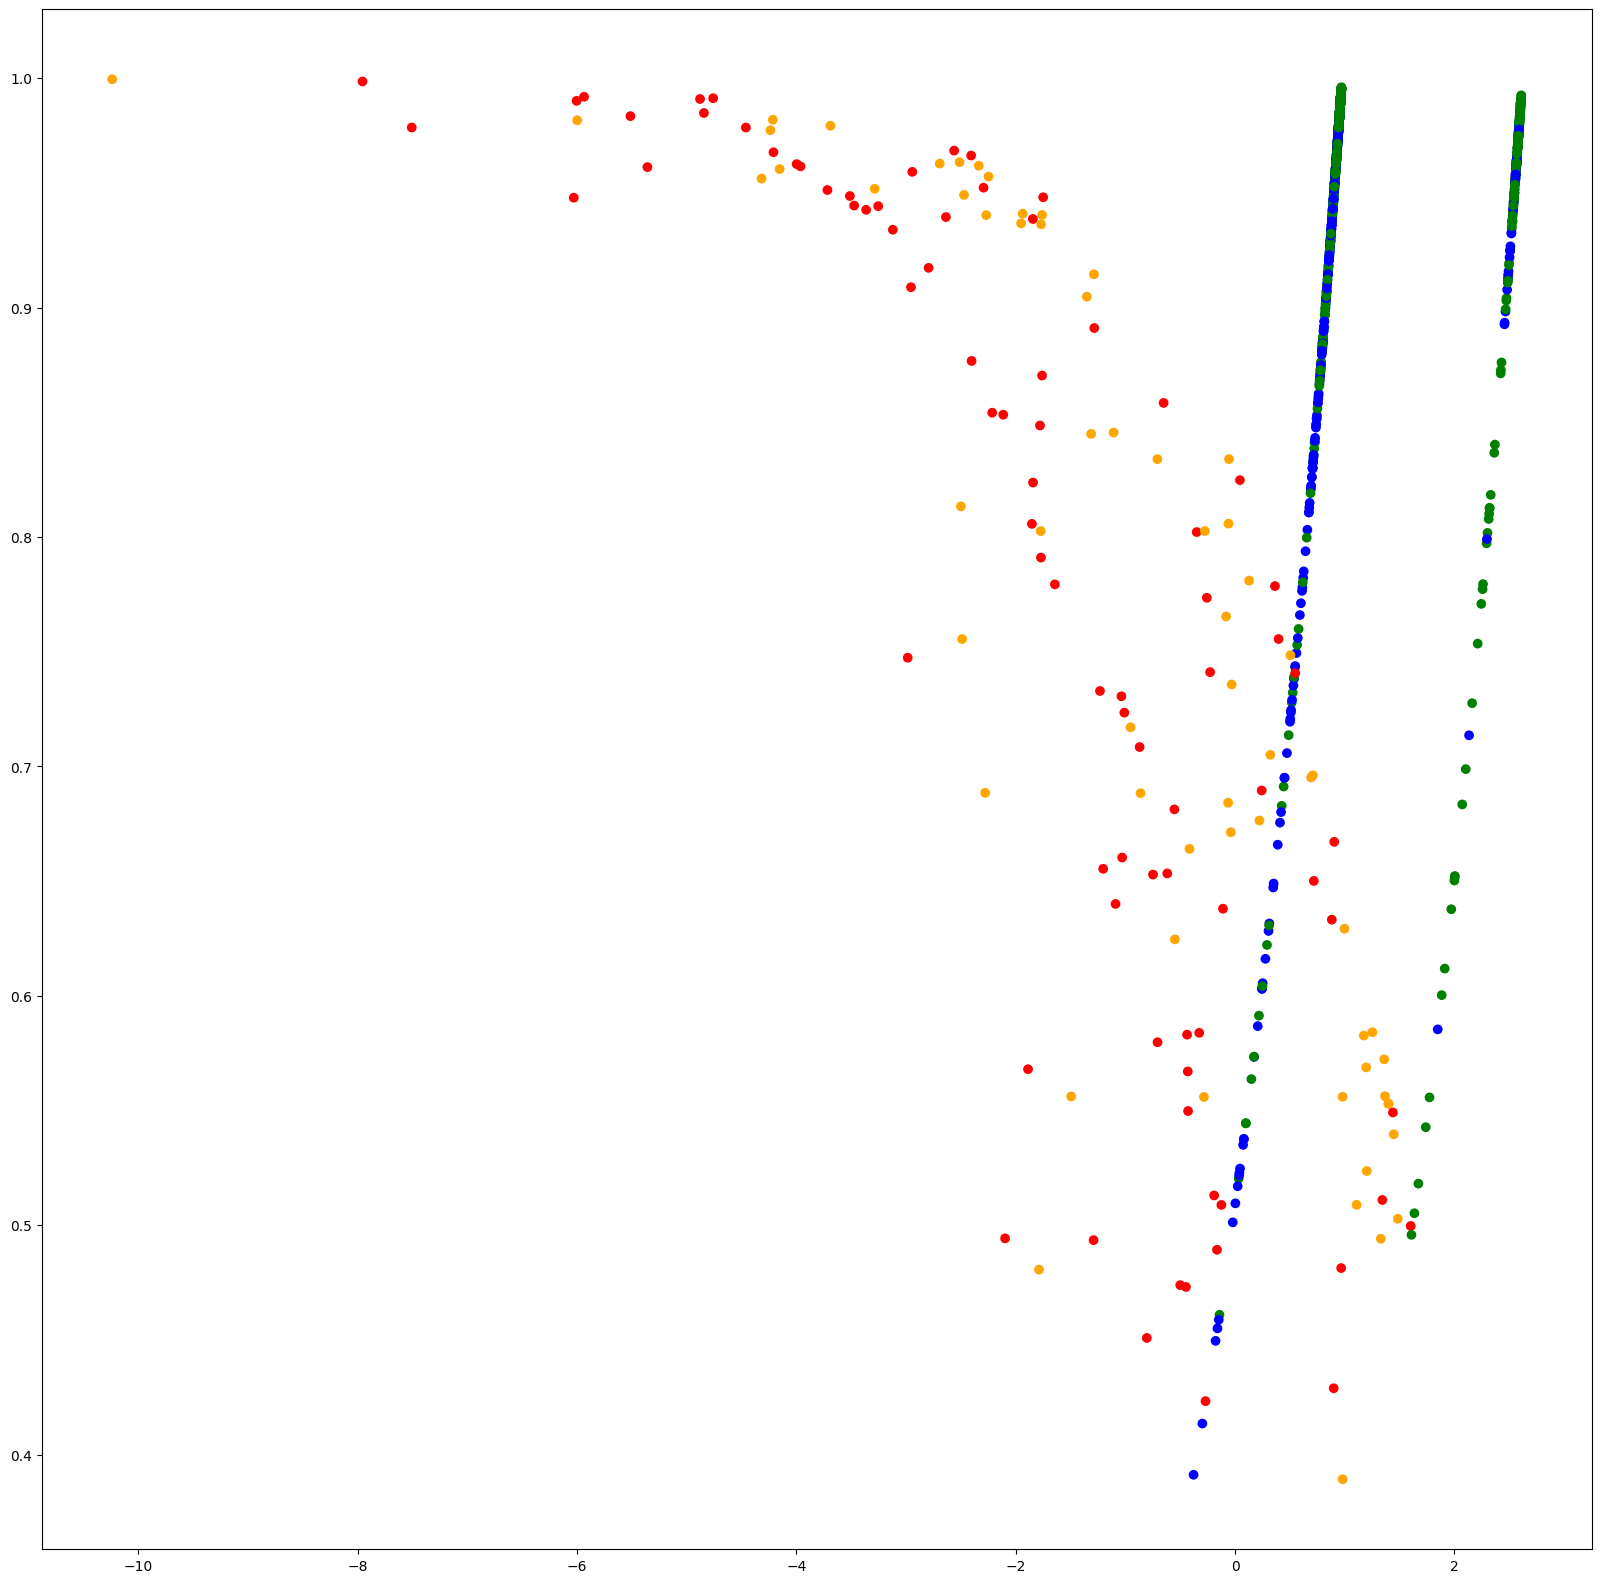

In [117]:
plot_scatter(x=merged_data["PVI"], y=merged_data["predicted_score"], colours=merged_data["colors"], figsize=(20,20))

## Deleted data analysis using PVI

### Optimize new threshold (new model, without scaling)

In [18]:
from sklearn import metrics
import scipy.optimize as opt

For filtering #1

In [30]:
def create_new_labels(x, threshold):
    if x.predicted_score < threshold:
        return "NOT ENOUGH INFO"
    else:
        return x.predicted_label

In [31]:
def opt_func_f1(threshold):
    human_labels = merged_data.human_label.to_numpy()
    predicted_labels = merged_data.apply(create_new_labels, axis=1, threshold=threshold).to_numpy()
    f1_score = metrics.f1_score(human_labels, predicted_labels, average="macro")
    return -f1_score

Optimize!

In [32]:
res = opt.fminbound(opt_func_f1, 0, 1, disp=3, xtol=1e-03, maxfun=30)

 
 Func-count     x          f(x)          Procedure
    1       0.381966    -0.530898        initial
    2       0.618034    -0.561718        golden
    3       0.763932    -0.602156        golden
    4       0.854102      -0.6302        golden
    5        0.90983    -0.661452        golden
    6       0.944272    -0.688102        golden
    7       0.965558      -0.6614        golden
    8       0.937681    -0.682184        parabolic
    9       0.952403    -0.676655        golden
   10       0.943843    -0.687625        parabolic
   11       0.947378    -0.684712        golden
   12       0.944949     -0.68733        parabolic
   13       0.944605    -0.686122        parabolic

Optimization terminated successfully;
The returned value satisfies the termination criteria
(using xtol =  0.001 )


In [36]:
res

0.9442719099991588

For filtering #2

In [19]:
def create_new_labels2(x, threshold):
    if (x.fever_label != x.predicted_label) and (x.predicted_score < threshold):
        return "NOT ENOUGH INFO"
    else:
        return x.predicted_label

In [20]:
def opt_func_f1_2(threshold):
    human_labels = merged_data.human_label.to_numpy()
    predicted_labels = merged_data.apply(create_new_labels2, axis=1, threshold=threshold).to_numpy()
    f1_score = metrics.f1_score(human_labels, predicted_labels, average="macro")
    return -f1_score

In [21]:
res2 = opt.fminbound(opt_func_f1_2, 0, 1, disp=3, xtol=1e-03, maxfun=30)

 
 Func-count     x          f(x)          Procedure
    1       0.381966    -0.530898        initial
    2       0.618034    -0.540988        golden
    3       0.763932    -0.569219        golden
    4       0.854102    -0.581759        golden
    5        0.90983    -0.589802        golden
    6       0.944272     -0.59805        golden
    7       0.965558     -0.60385        golden
    8       0.978714    -0.606565        golden
    9       0.986844    -0.607676        golden
   10       0.991869     -0.60882        golden
   11       0.994975    -0.608435        golden
   12       0.992203    -0.608435        parabolic
   13        0.98995    -0.607676        golden
   14       0.991136    -0.607676        golden
   15       0.991536     -0.60882        golden

Optimization terminated successfully;
The returned value satisfies the termination criteria
(using xtol =  0.001 )


In [22]:
res2

0.9915360331990829

For filtering #3

In [23]:
def create_new_labels3(x, threshold):
    if (x.fever_label != x.predicted_label) and (x.predicted_score >= threshold):
        return "NOT ENOUGH INFO"
    else:
        return x.predicted_label

In [24]:
def opt_func_f1_3(threshold):
    human_labels = merged_data.human_label.to_numpy()
    predicted_labels = merged_data.apply(create_new_labels3, axis=1, threshold=threshold).to_numpy()
    f1_score = metrics.f1_score(human_labels, predicted_labels, average="macro")
    return -f1_score

In [27]:
res3 = opt.fminbound(opt_func_f1_3, 0, 1, disp=3, xtol=1e-03, maxfun=30)

 
 Func-count     x          f(x)          Procedure
    1       0.381966    -0.608435        initial
    2       0.618034    -0.601398        golden
    3       0.236068    -0.608435        golden
    4       0.309017    -0.608435        parabolic
    5       0.281153    -0.608435        golden
    6       0.263932    -0.608435        golden
    7       0.253289    -0.608435        golden
    8       0.246711    -0.608435        golden
    9       0.242646    -0.608435        golden
   10       0.240133    -0.608435        golden
   11        0.23858    -0.608435        golden
   12       0.237621    -0.608435        golden
   13       0.237028    -0.608435        golden
   14       0.236661    -0.608435        golden

Optimization terminated successfully;
The returned value satisfies the termination criteria
(using xtol =  0.001 )


In [28]:
res3

0.2366610981446108

### Mark which were deleted and Investigate their PVI's (possibly plot)

⬇️ Original filtering (filter everything under threshold)

Annotated

In [39]:
to_colour = merged_data.apply(lambda x, threshold : x.predicted_score > threshold, axis=1, threshold=0.9442719099991588)

<Figure size 15360x11520 with 0 Axes>

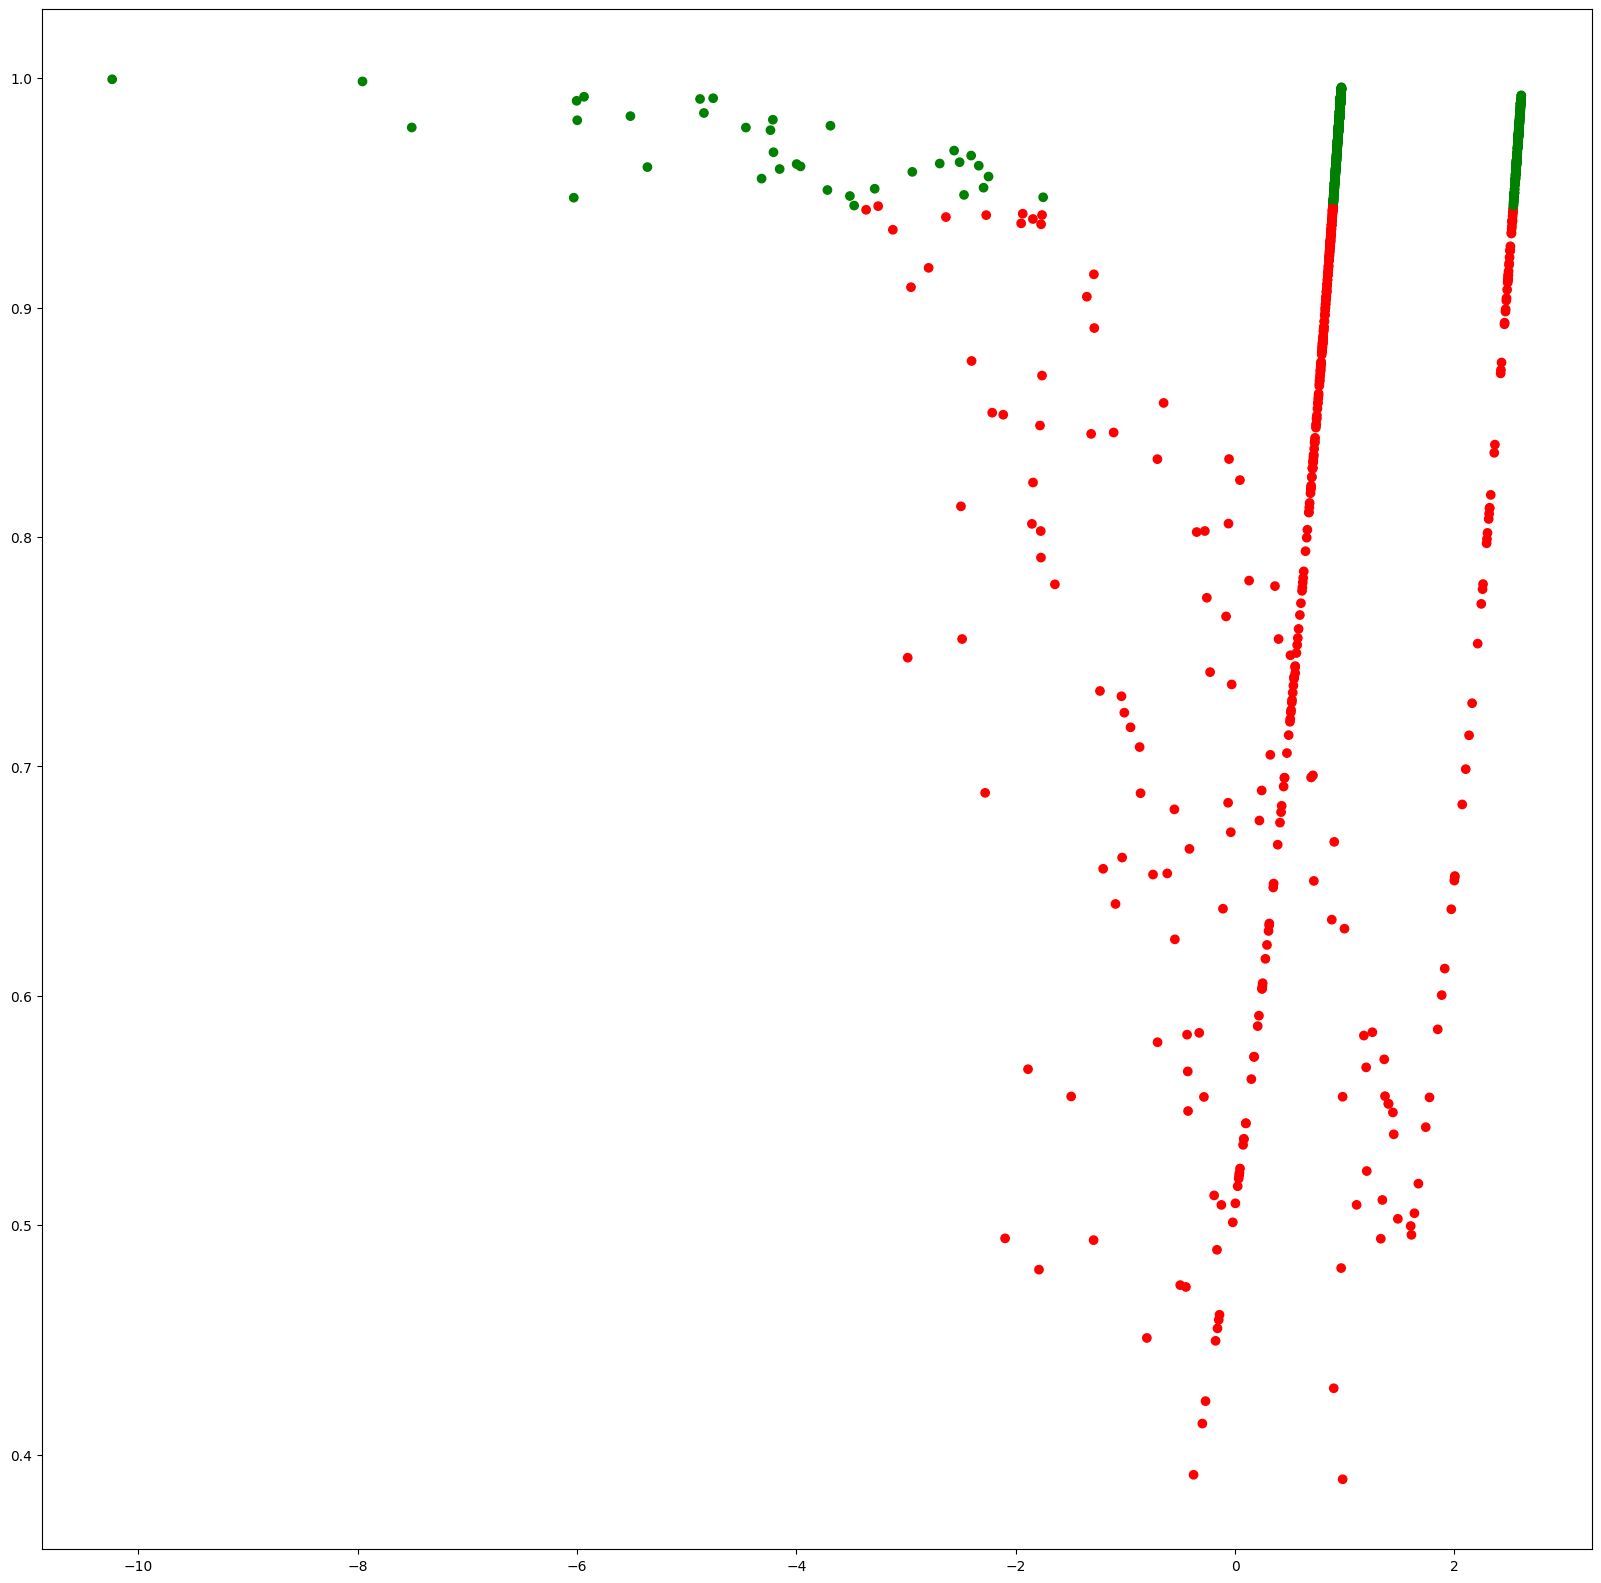

In [40]:
plot_scatter(x=merged_data["PVI"], y=merged_data["predicted_score"], to_colours=to_colour, figsize=(20,20))

train

<Figure size 15360x11520 with 0 Axes>

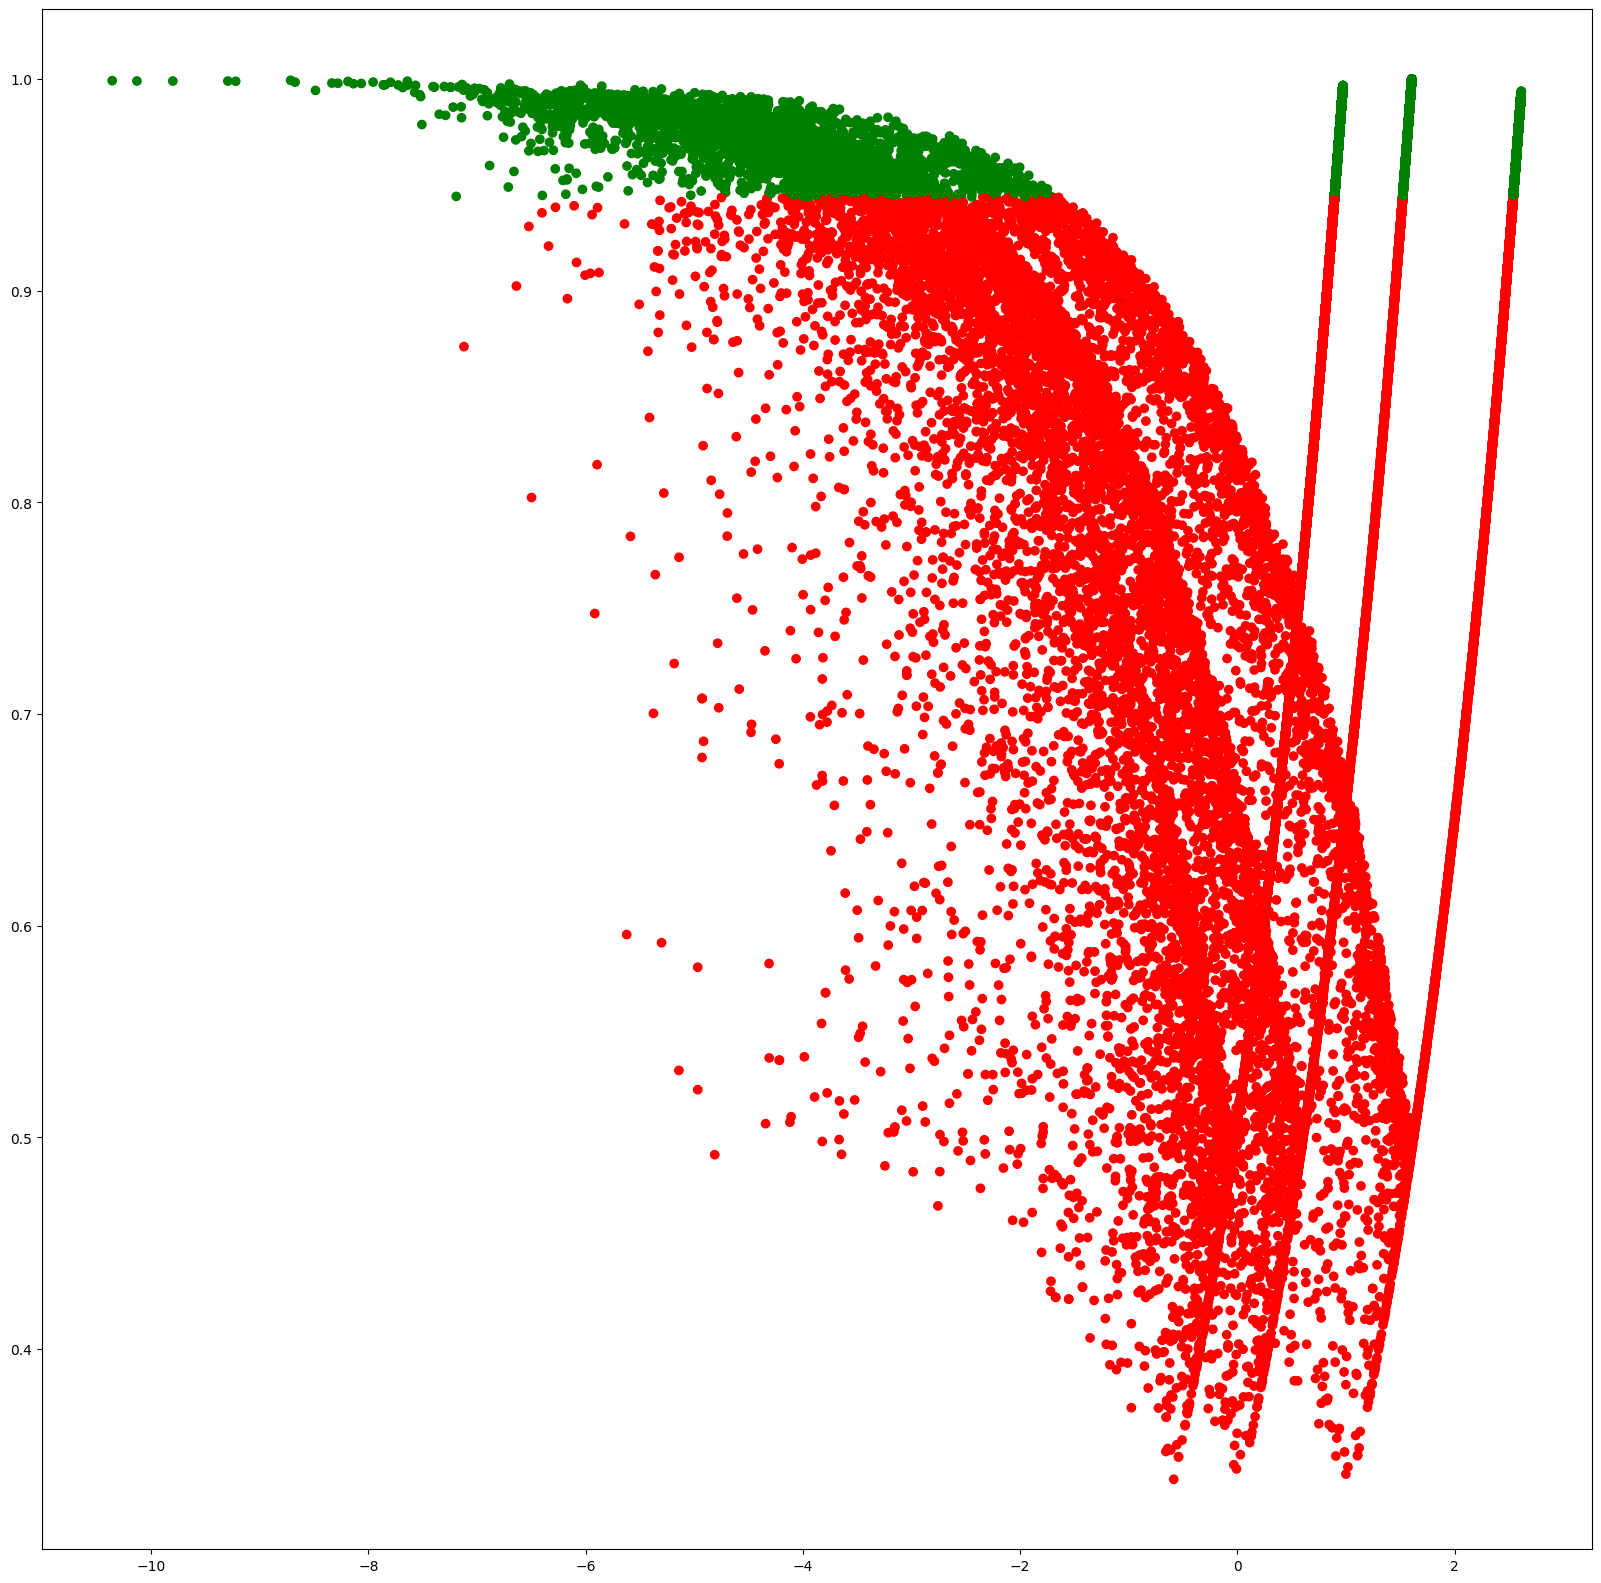

In [44]:
to_colour = train_data.apply(lambda x, threshold : x.predicted_score > threshold, axis=1, threshold=0.9442719099991588)
plot_scatter(x=train_data["PVI"], y=train_data["predicted_score"], to_colours=to_colour, figsize=(20,20))

In [51]:
unique, counts = np.unique(to_colour.to_numpy(), return_counts=True)
print(unique)
print(counts)
print(counts[1]/sum(counts)*100)

[False  True]
[35344 83606]
70.28667507356032


dev

<Figure size 15360x11520 with 0 Axes>

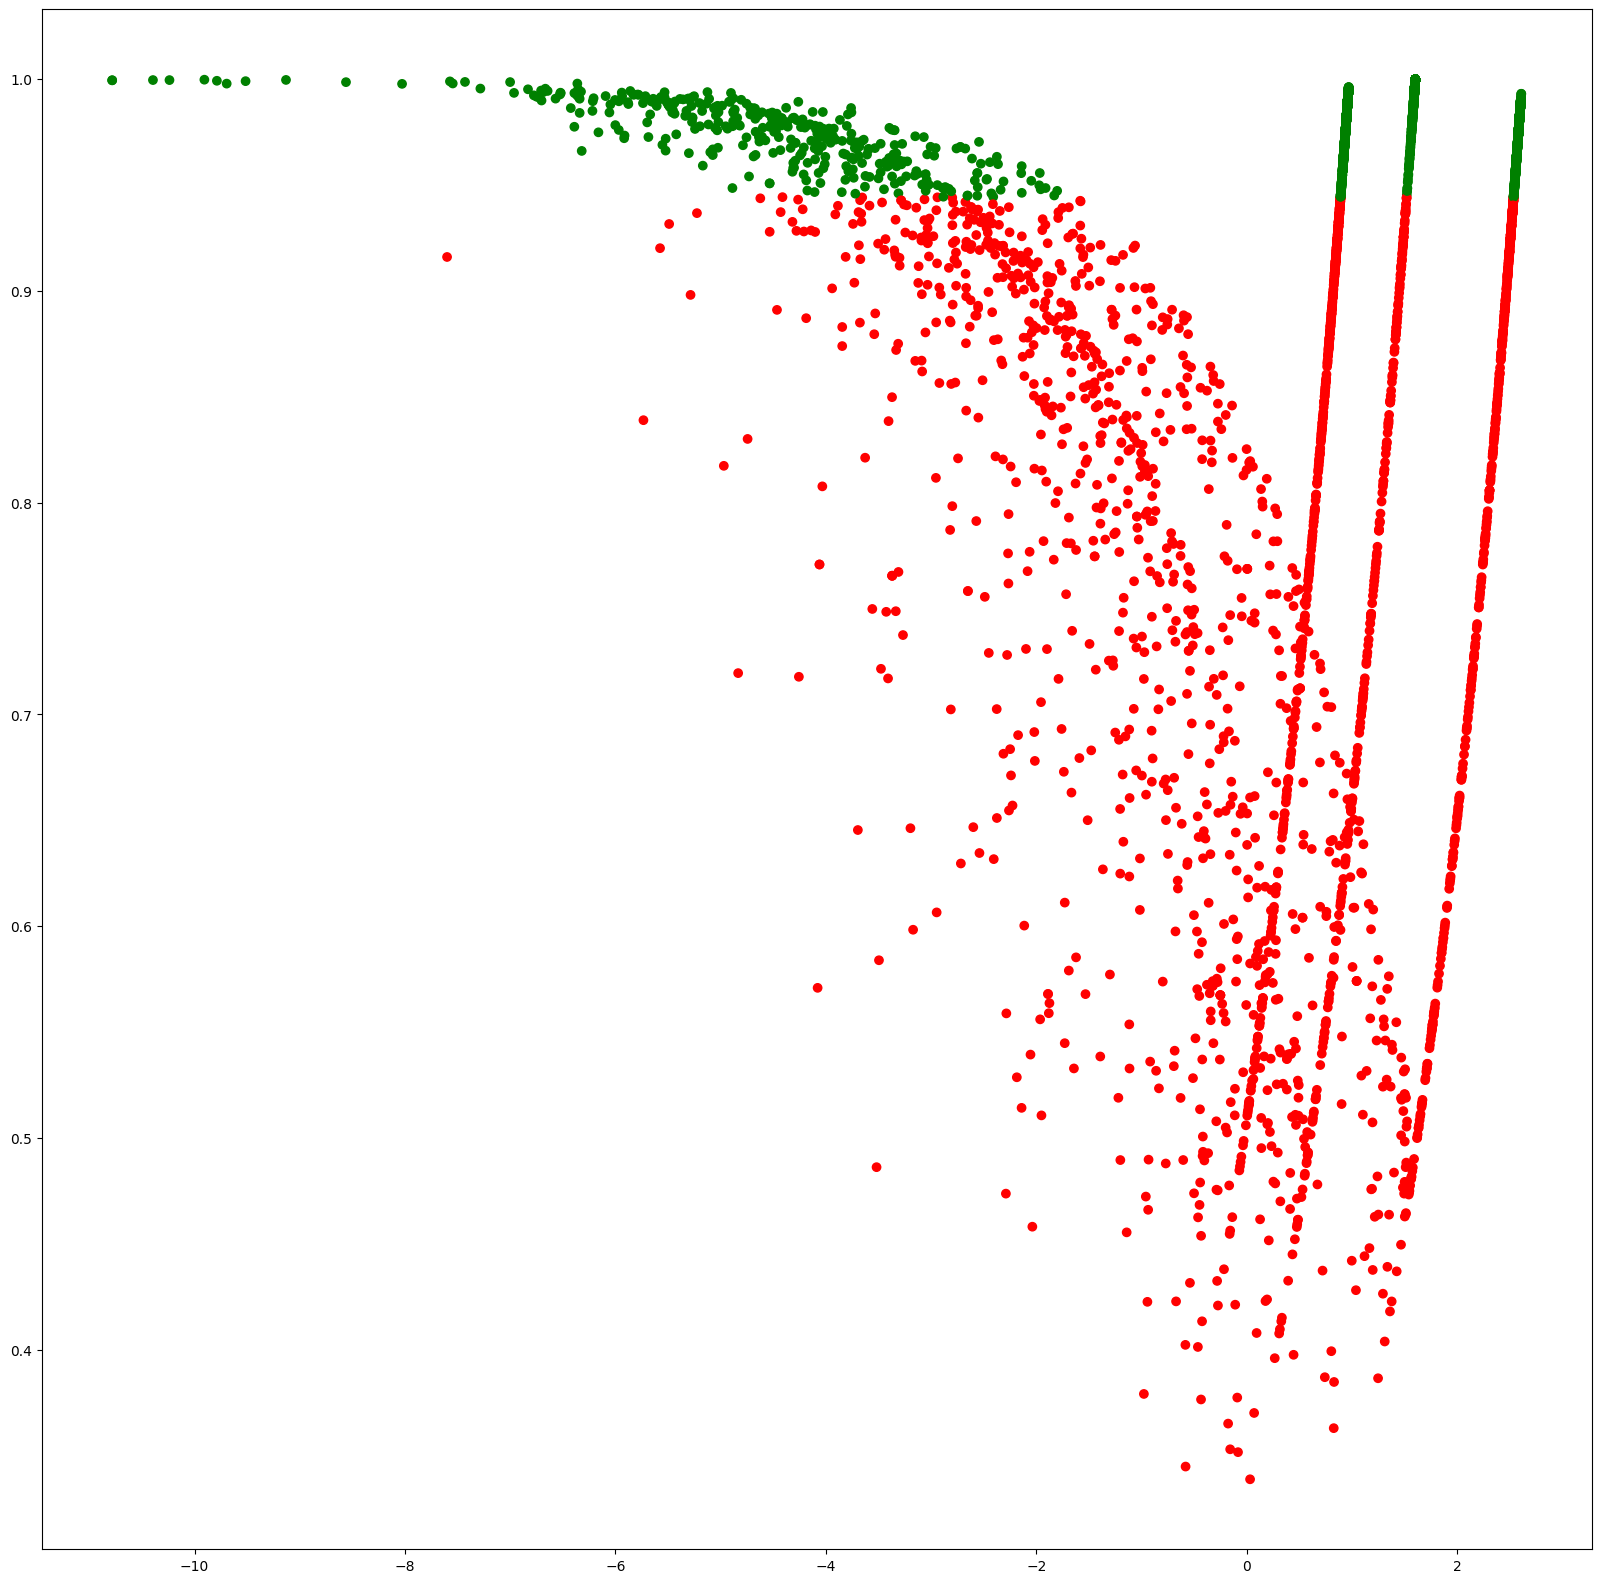

In [52]:
to_colour = dev_data.apply(lambda x, threshold : x.predicted_score > threshold, axis=1, threshold=0.9442719099991588)
plot_scatter(x=dev_data["PVI"], y=dev_data["predicted_score"], to_colours=to_colour, figsize=(20,20))

In [53]:
unique, counts = np.unique(to_colour.to_numpy(), return_counts=True)
print(unique)
print(counts)
print(counts[1]/sum(counts)*100)

[False  True]
[2318 5140]
68.91928130866184


test

<Figure size 15360x11520 with 0 Axes>

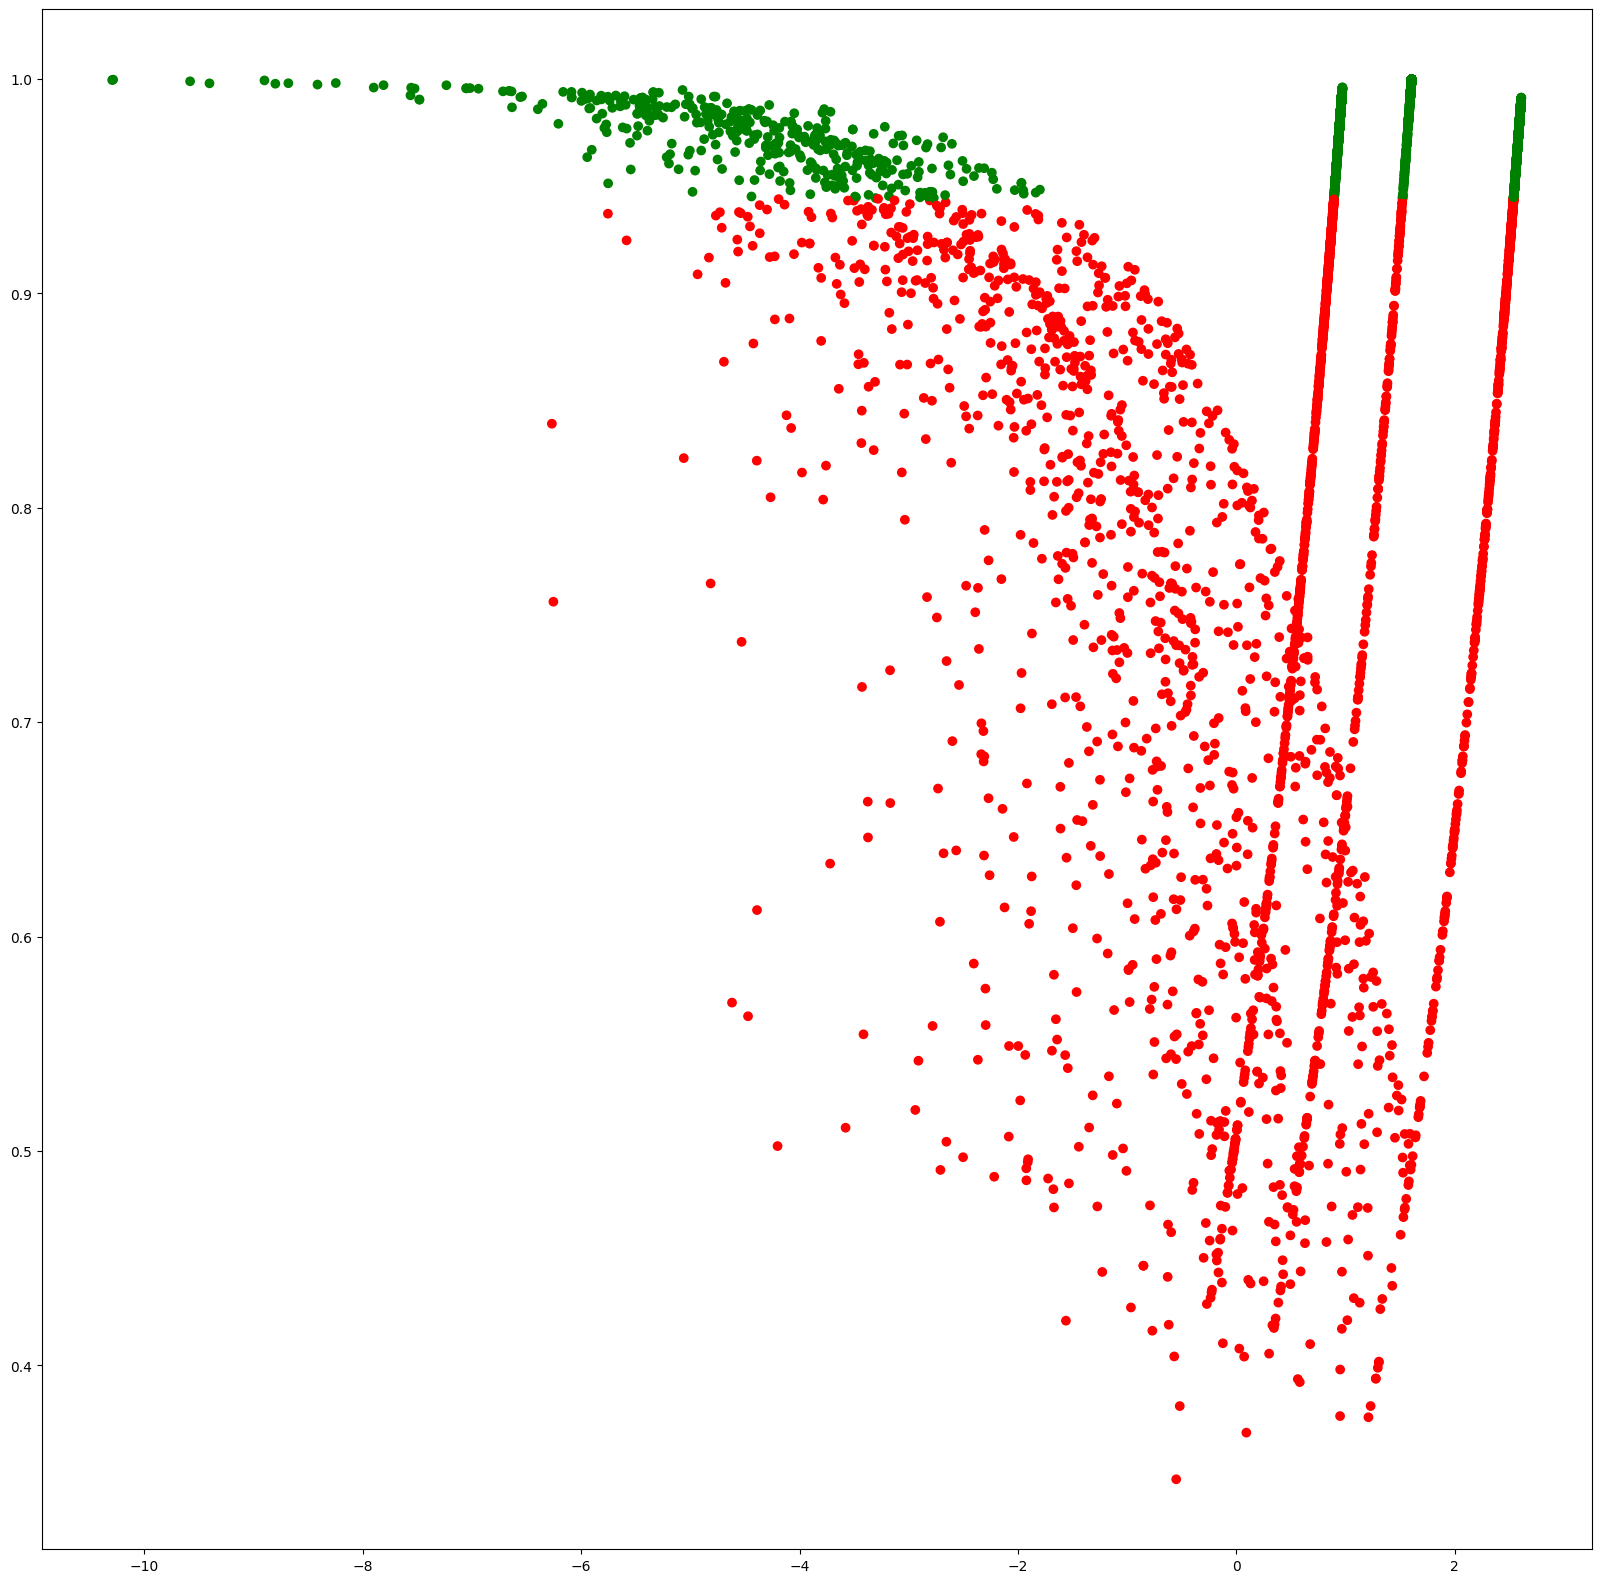

In [54]:
to_colour = test_data.apply(lambda x, threshold : x.predicted_score > threshold, axis=1, threshold=0.9442719099991588)
plot_scatter(x=test_data["PVI"], y=test_data["predicted_score"], to_colours=to_colour, figsize=(20,20))

In [55]:
unique, counts = np.unique(to_colour.to_numpy(), return_counts=True)
print(unique)
print(counts)
print(counts[1]/sum(counts)*100)

[False  True]
[2506 5014]
66.67553191489361


⬇️ Filtering #2 (filters data points where predicted label does not equals FEVER label and the predicted score is below a given threshold values)

In [29]:
THRESHOLD_2 = 0.9915360331990829

train

<Figure size 15360x11520 with 0 Axes>

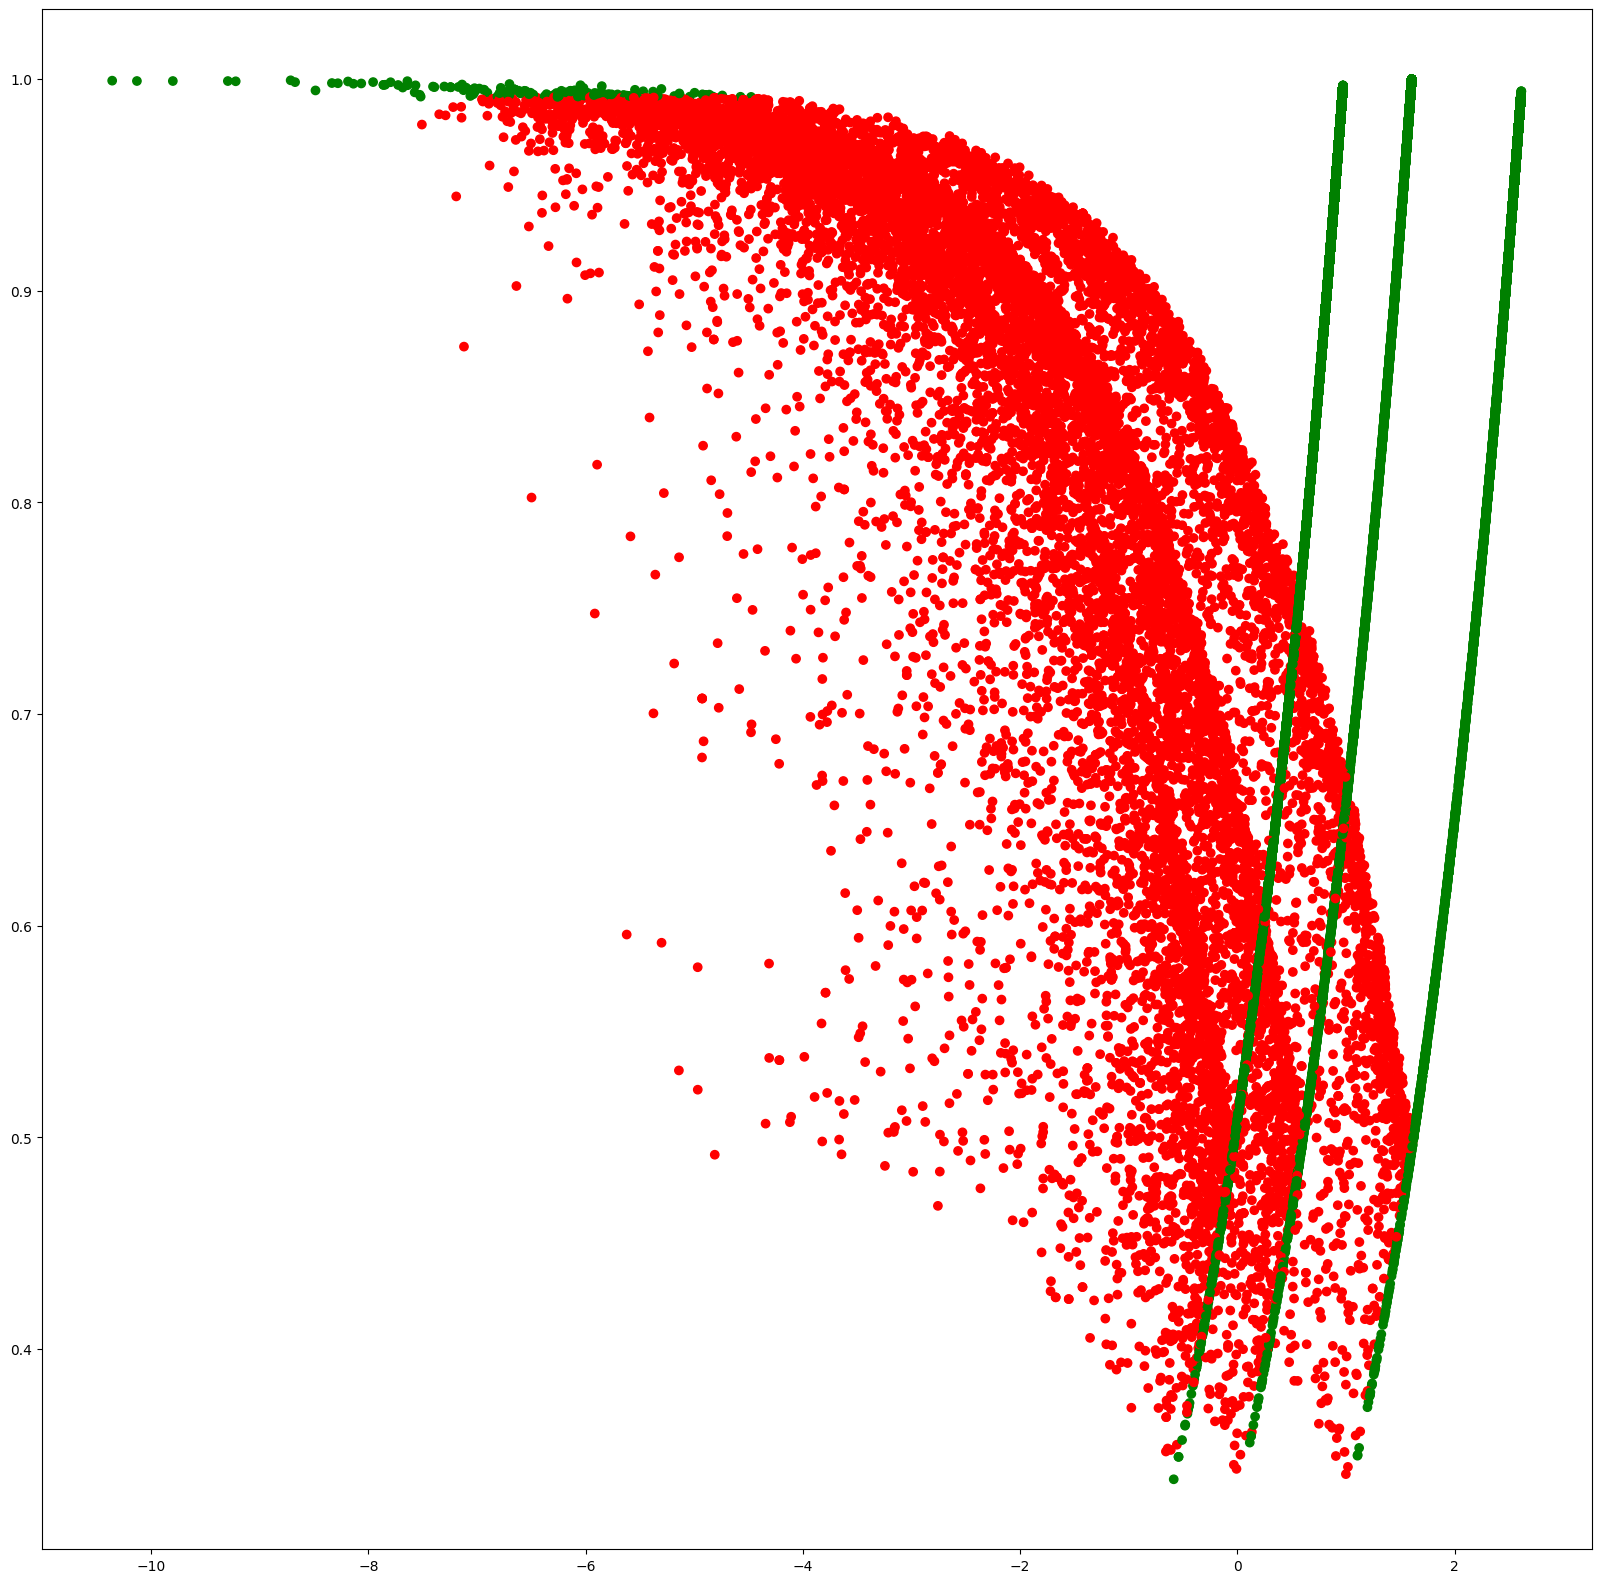

In [42]:
to_colour = train_data.apply(lambda x, threshold : x.predicted_score > threshold or x.fever_label == x.predicted_label, axis=1, threshold=THRESHOLD_2)
plot_scatter(x=train_data["PVI"], y=train_data["predicted_score"], to_colours=to_colour, figsize=(20,20))

In [43]:
unique, counts = np.unique(to_colour.to_numpy(), return_counts=True)
print(unique)
print(counts)
print(counts[1]/sum(counts)*100)

[False  True]
[ 14617 104333]
87.71164354770912


dev

<Figure size 15360x11520 with 0 Axes>

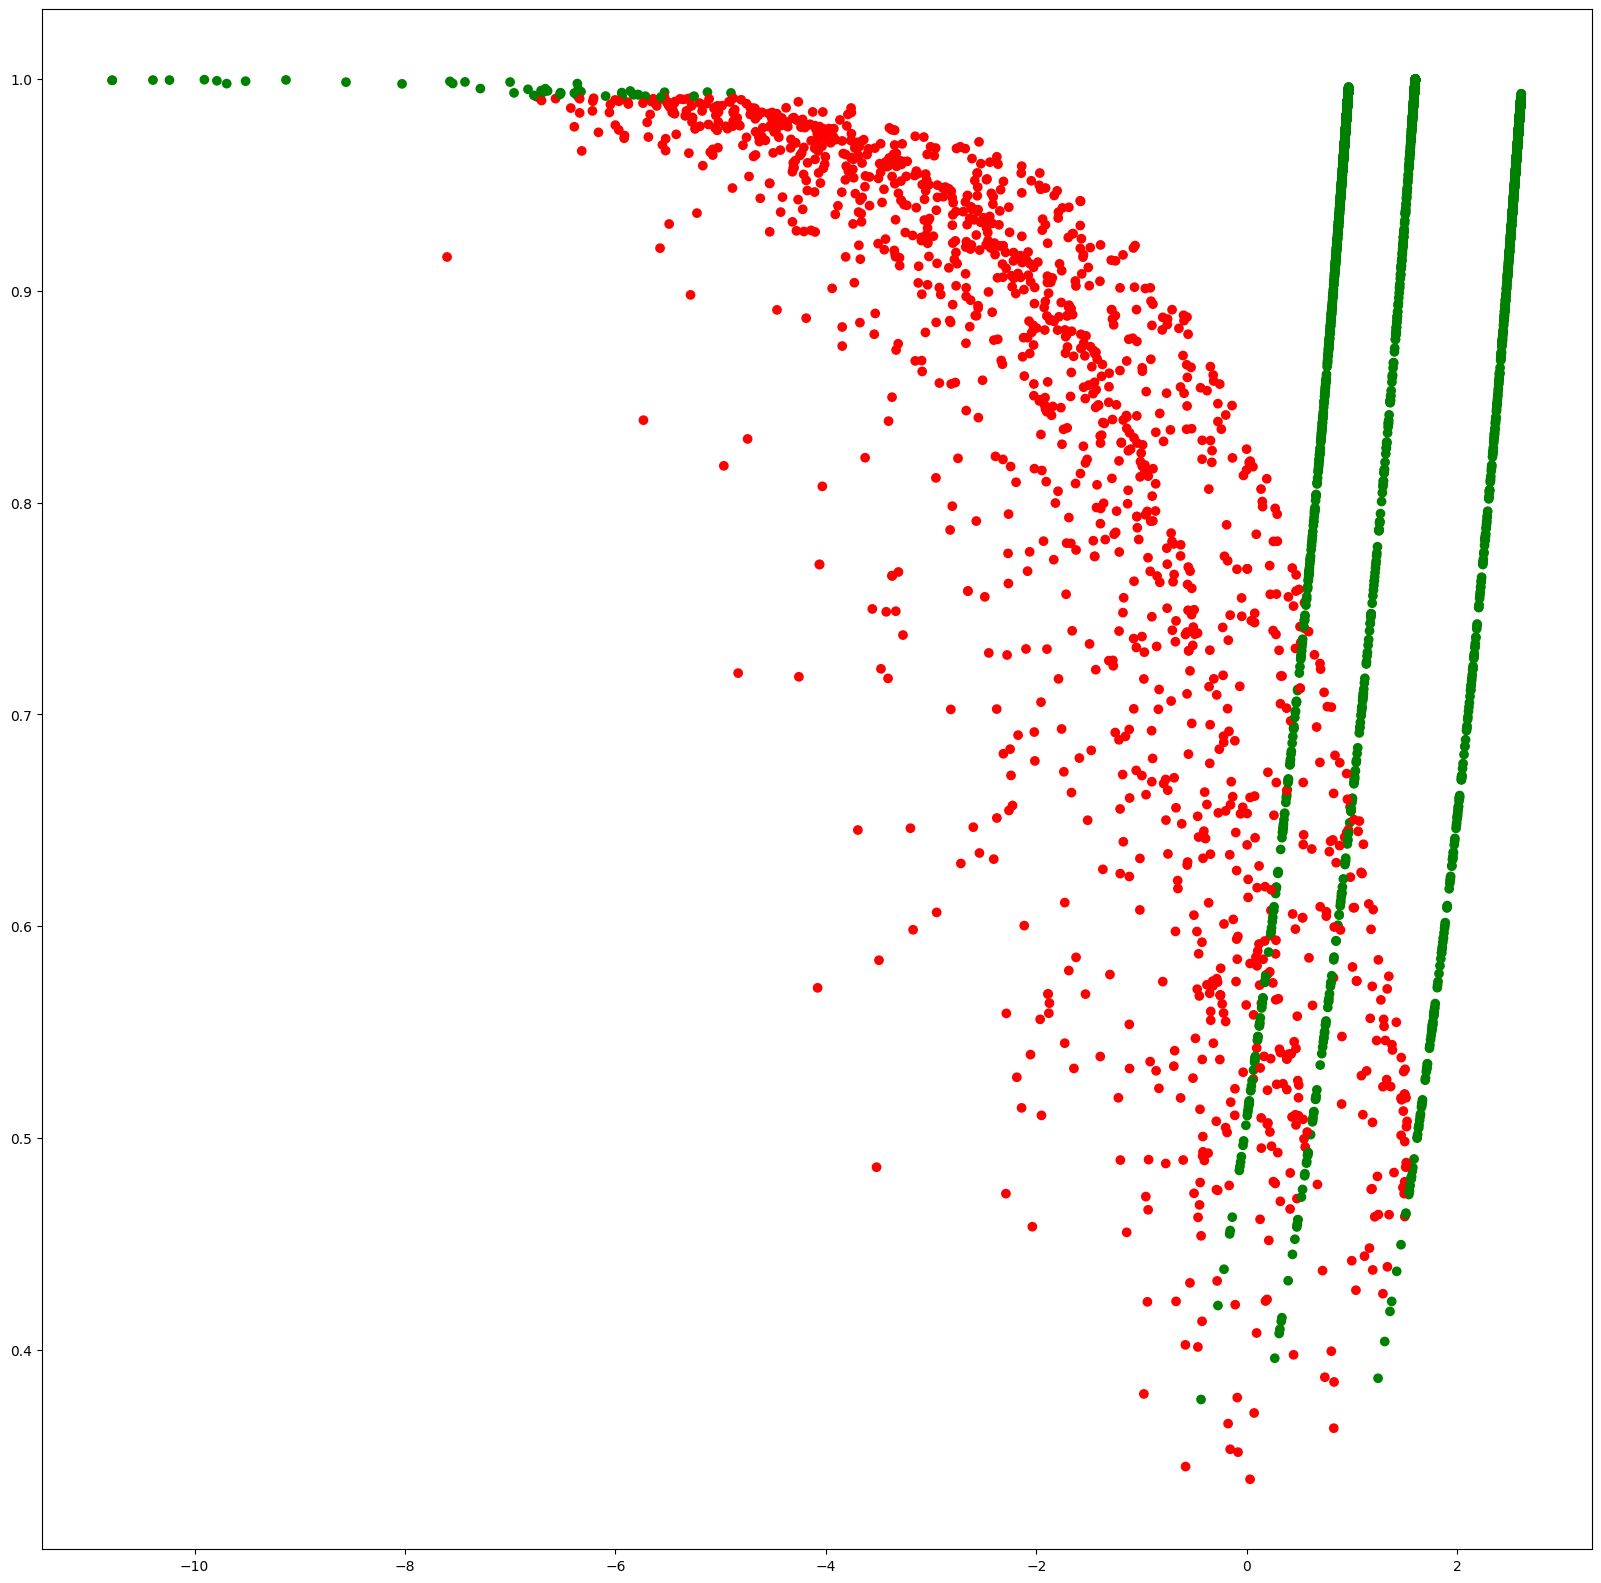

In [44]:
to_colour = dev_data.apply(lambda x, threshold : x.predicted_score > threshold or x.fever_label == x.predicted_label, axis=1, threshold=THRESHOLD_2)
plot_scatter(x=dev_data["PVI"], y=dev_data["predicted_score"], to_colours=to_colour, figsize=(20,20))

In [45]:
unique, counts = np.unique(to_colour.to_numpy(), return_counts=True)
print(unique)
print(counts)
print(counts[1]/sum(counts)*100)

[False  True]
[1322 6136]
82.27406811477607


test

<Figure size 15360x11520 with 0 Axes>

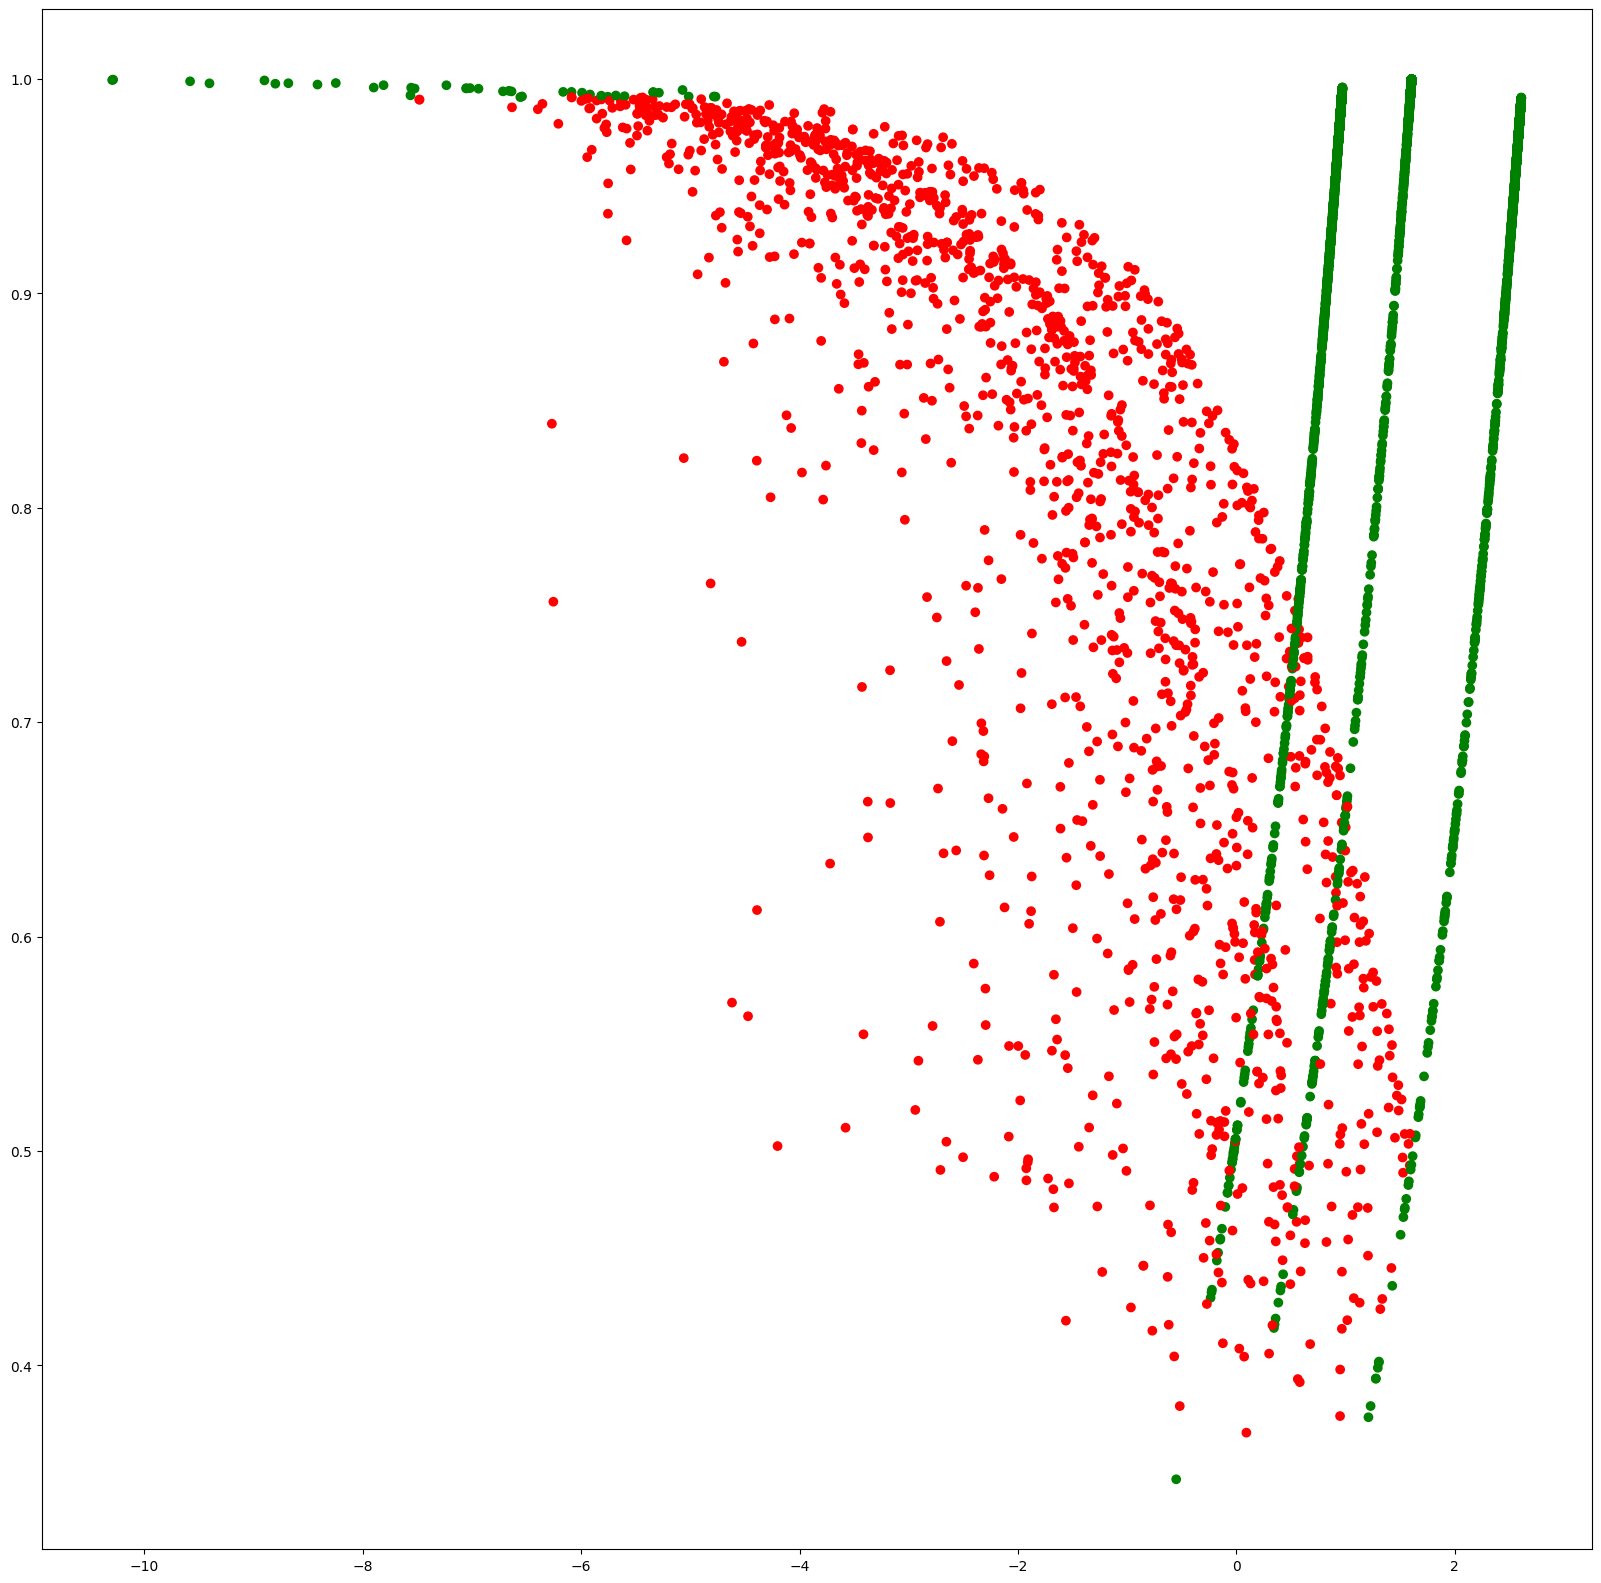

In [47]:
to_colour = test_data.apply(lambda x, threshold : x.predicted_score > threshold or x.fever_label == x.predicted_label, axis=1, threshold=THRESHOLD_2)
plot_scatter(x=test_data["PVI"], y=test_data["predicted_score"], to_colours=to_colour, figsize=(20,20))

In [48]:
unique, counts = np.unique(to_colour.to_numpy(), return_counts=True)
print(unique)
print(counts)
print(counts[1]/sum(counts)*100)

[False  True]
[1466 6054]
80.50531914893617


⬇️ Filtering #3 - Bertík (filters data points where the predicted label is not the same as FEVER label and where the predicted score is higher than a given threshold)

In [49]:
THRESHOLD_3 = 0.2366610981446108

train

<Figure size 15360x11520 with 0 Axes>

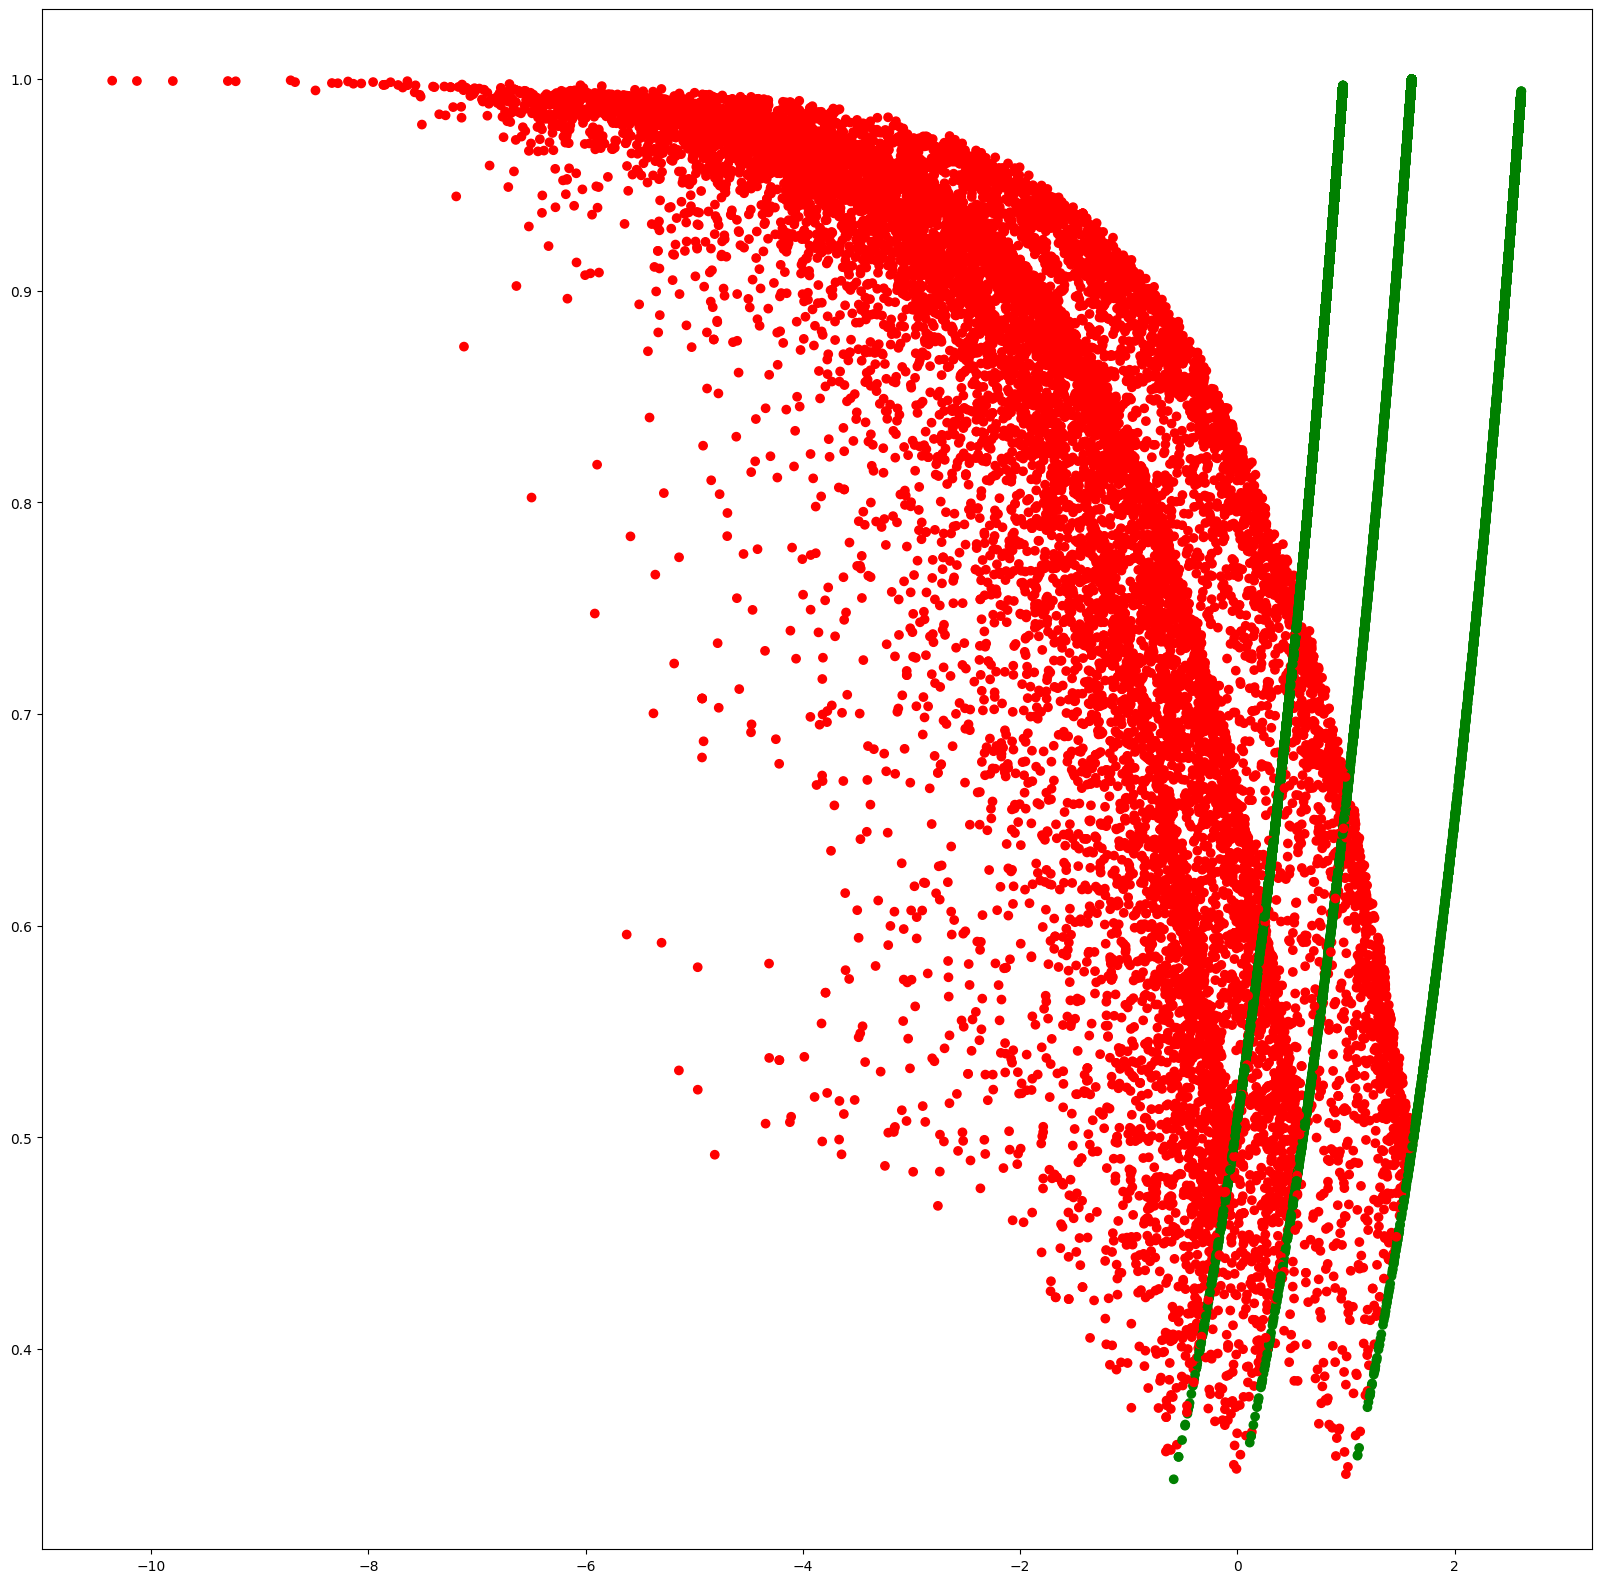

In [50]:
to_colour = train_data.apply(lambda x, threshold : x.predicted_score < threshold or x.fever_label == x.predicted_label, axis=1, threshold=THRESHOLD_3)
plot_scatter(x=train_data["PVI"], y=train_data["predicted_score"], to_colours=to_colour, figsize=(20,20))

In [51]:
unique, counts = np.unique(to_colour.to_numpy(), return_counts=True)
print(unique)
print(counts)
print(counts[1]/sum(counts)*100)

[False  True]
[ 14774 104176]
87.57965531736023


dev

<Figure size 15360x11520 with 0 Axes>

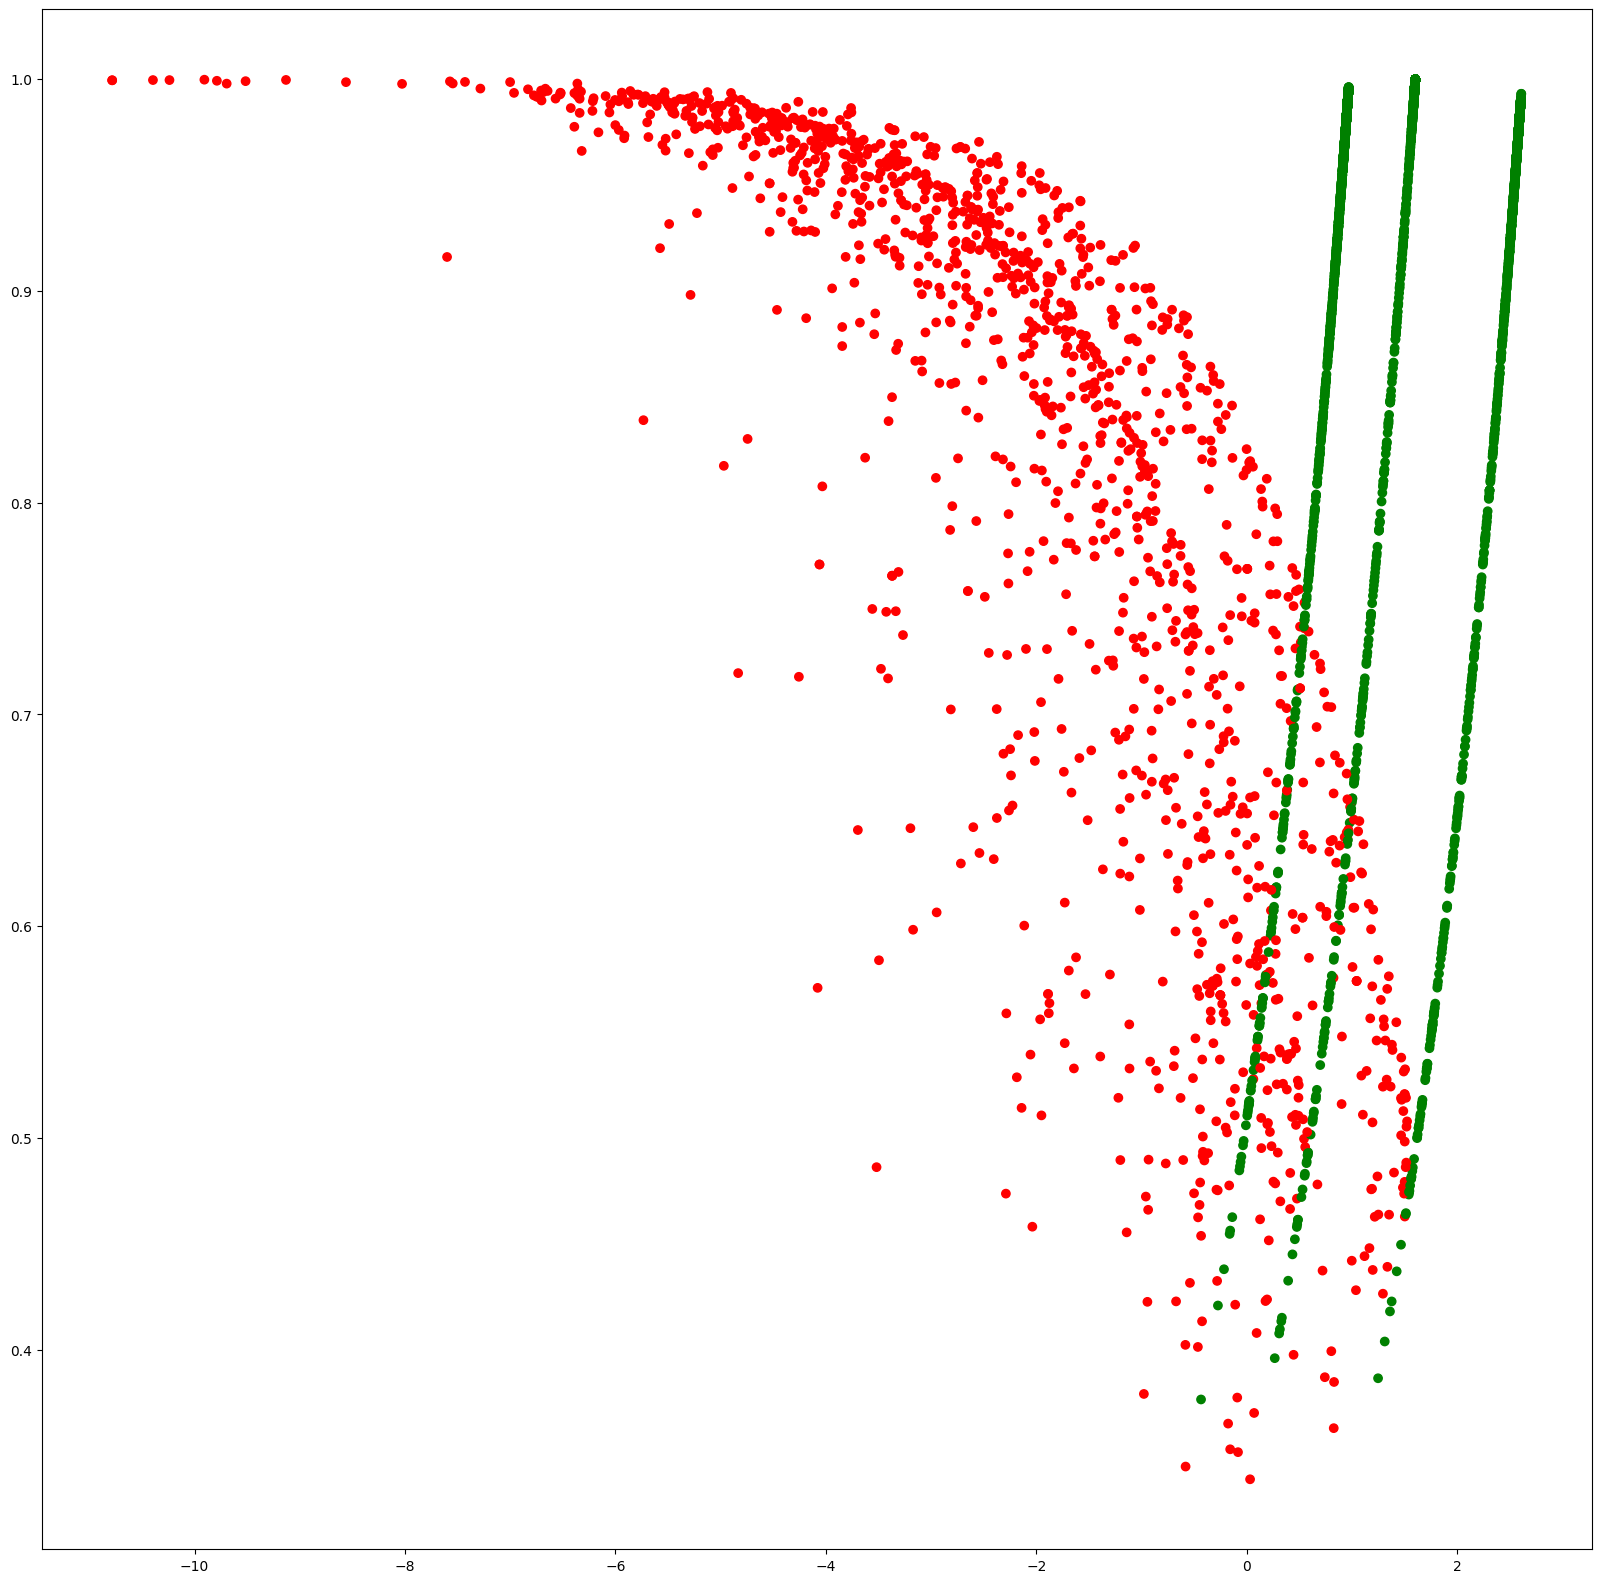

In [52]:
to_colour = dev_data.apply(lambda x, threshold : x.predicted_score < threshold or x.fever_label == x.predicted_label, axis=1, threshold=THRESHOLD_3)
plot_scatter(x=dev_data["PVI"], y=dev_data["predicted_score"], to_colours=to_colour, figsize=(20,20))

In [53]:
unique, counts = np.unique(to_colour.to_numpy(), return_counts=True)
print(unique)
print(counts)
print(counts[1]/sum(counts)*100)

[False  True]
[1370 6088]
81.63046393134888


test

<Figure size 15360x11520 with 0 Axes>

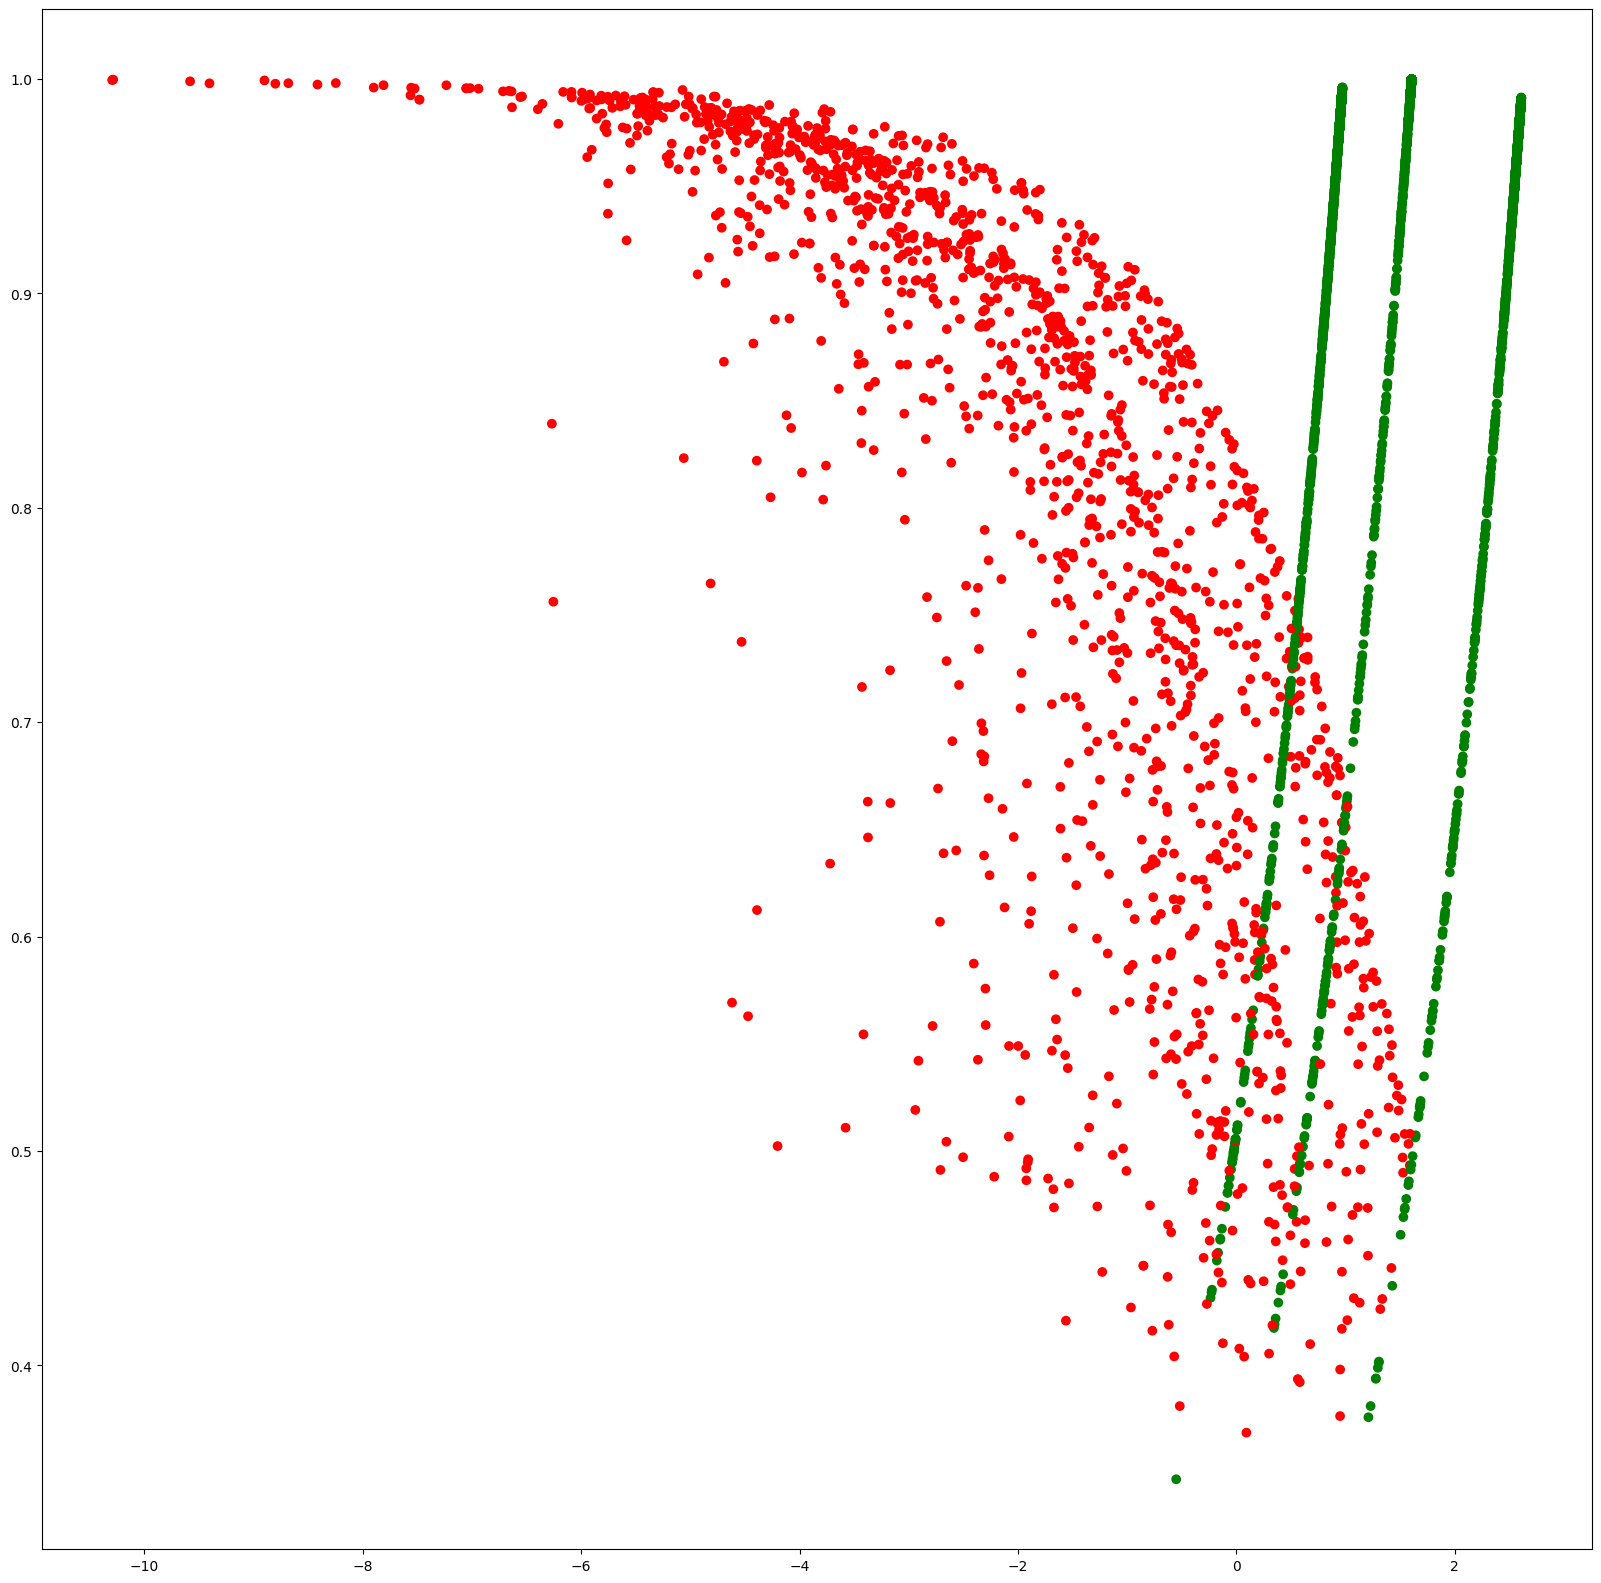

In [54]:
to_colour = test_data.apply(lambda x, threshold : x.predicted_score < threshold or x.fever_label == x.predicted_label, axis=1, threshold=THRESHOLD_3)
plot_scatter(x=test_data["PVI"], y=test_data["predicted_score"], to_colours=to_colour, figsize=(20,20))

In [55]:
unique, counts = np.unique(to_colour.to_numpy(), return_counts=True)
print(unique)
print(counts)
print(counts[1]/sum(counts)*100)

[False  True]
[1505 6015]
79.98670212765957
